# Notes on Random Regressors and Their Implications for OLS Models

## Introduction
- **Random Regressors**: Regressors (X) that are not fixed and change with the sample. This variation can also affect the response variable (y).

## Problem with OLS in the Presence of Random Regressors
- **Correlation with Error Term**: If X is correlated with the error term (u), it violates the assumptions required for the Ordinary Least Squares (OLS) model to provide unbiased and consistent estimates.
- **Impact on OLS**: The OLS estimator $$ b = (X'X)^{-1}X'y $$ assumes that X and u are independent. If this assumption fails due to the random nature of X and its correlation with u, OLS becomes biased and inconsistent.
- **BLUE Property**: Under correct OLS assumptions, the estimator is Best Linear Unbiased Estimator (BLUE), characterized as linear, unbiased, efficient, and consistent.

## Solutions and Advanced Techniques
- **Instrumental Variables (IV)**: To address the issue of endogeneity and correlation between X and u, IV techniques are employed. Instruments (Z) should be correlated with X but not with the error term (u).
- **Two-Stage Least Squares (TSLS)**: A specific form of IV estimation where:
  1. **First Stage**: Regress X on Z to get predicted values of X.
  2. **Second Stage**: Use the predicted values from the first stage to estimate y, providing an estimator that is consistent even if X is correlated with u.

## Mathematical Representation and Assumptions
- **Substitution into OLS Estimator**: Substituting the model $$ y = X\beta + u $$ into the OLS estimator results in $$ \hat{\beta} = \beta + (X'X)^{-1}X'u $$.
- **Expectation Analysis**:
  - Ideal Case: $$ E[\hat{\beta}] = \beta $$ if X and u are independent (i.e., $$ E[X'u] = 0 $$).
  - With Random Regressors: $$ E[\hat{\beta}] \neq \beta $$ if $$ E[X'u] \neq 0 $$, indicating bias.

## Theoretical Considerations
- **Assumptions for IV and TSLS**:
  1. **IV1**: Linearity in parameters.
  2. **IV2**: Observations are independent and identically distributed.
  3. **IV3**: Finite fourth moments for variables.
  4. **IV4**: Positive definite $$ E[X'X/n] $$.
  5. **IV5**: Rank condition $$ E[Z'X/n] $$ for identifiability.
  6. **IV6**: $$ E[Z'u/n] = 0 $$, ensuring instruments are valid.
  7. **IV7**: Homoscedastic errors conditional on instruments.


### An Example: Returns to Schooling

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('data/SchoolingReturns.csv', index_col=0)

# Descriptive statistics
print(df.describe())
df['ethnicity'] = df['ethnicity'].astype('category')


              wage    education   experience          age  education66  \
count  3010.000000  3010.000000  3010.000000  3010.000000  3010.000000   
mean    577.282392    13.263455     8.856146    28.119601    10.758140   
std     262.958302     2.676913     4.141672     3.137004     2.371869   
min     100.000000     1.000000     0.000000    24.000000     0.000000   
25%     394.250000    12.000000     6.000000    25.000000     9.000000   
50%     537.500000    13.000000     8.000000    28.000000    11.000000   
75%     708.750000    16.000000    11.000000    31.000000    12.000000   
max    2404.000000    18.000000    23.000000    34.000000    18.000000   

        feducation   meducation  fameducation          kww           iq  
count  3010.000000  3010.000000   3010.000000  2963.000000  2061.000000  
mean      9.988904    10.336628      5.933887    33.540668   102.449782  
std       3.266501     2.987510      2.638383     8.611619    15.423756  
min       0.000000     0.000000      

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3010 entries, 1 to 3010
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   wage          3010 non-null   int64   
 1   education     3010 non-null   int64   
 2   experience    3010 non-null   int64   
 3   ethnicity     3010 non-null   category
 4   smsa          3010 non-null   bool    
 5   south         3010 non-null   bool    
 6   age           3010 non-null   int64   
 7   nearcollege   3010 non-null   bool    
 8   nearcollege2  3010 non-null   bool    
 9   nearcollege4  3010 non-null   object  
 10  enrolled      3010 non-null   bool    
 11  married       3003 non-null   object  
 12  education66   3010 non-null   int64   
 13  smsa66        3010 non-null   bool    
 14  south66       3010 non-null   bool    
 15  feducation    3010 non-null   float64 
 16  meducation    3010 non-null   float64 
 17  fameducation  3010 non-null   int64   
 18  kww          

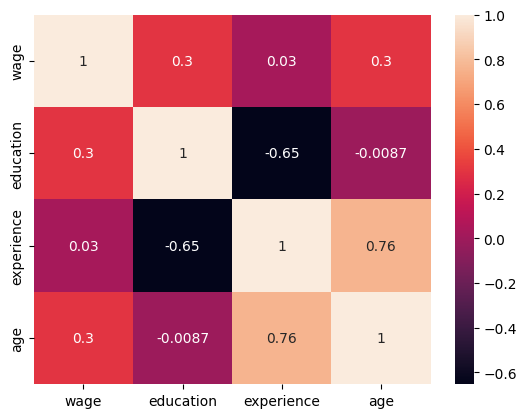

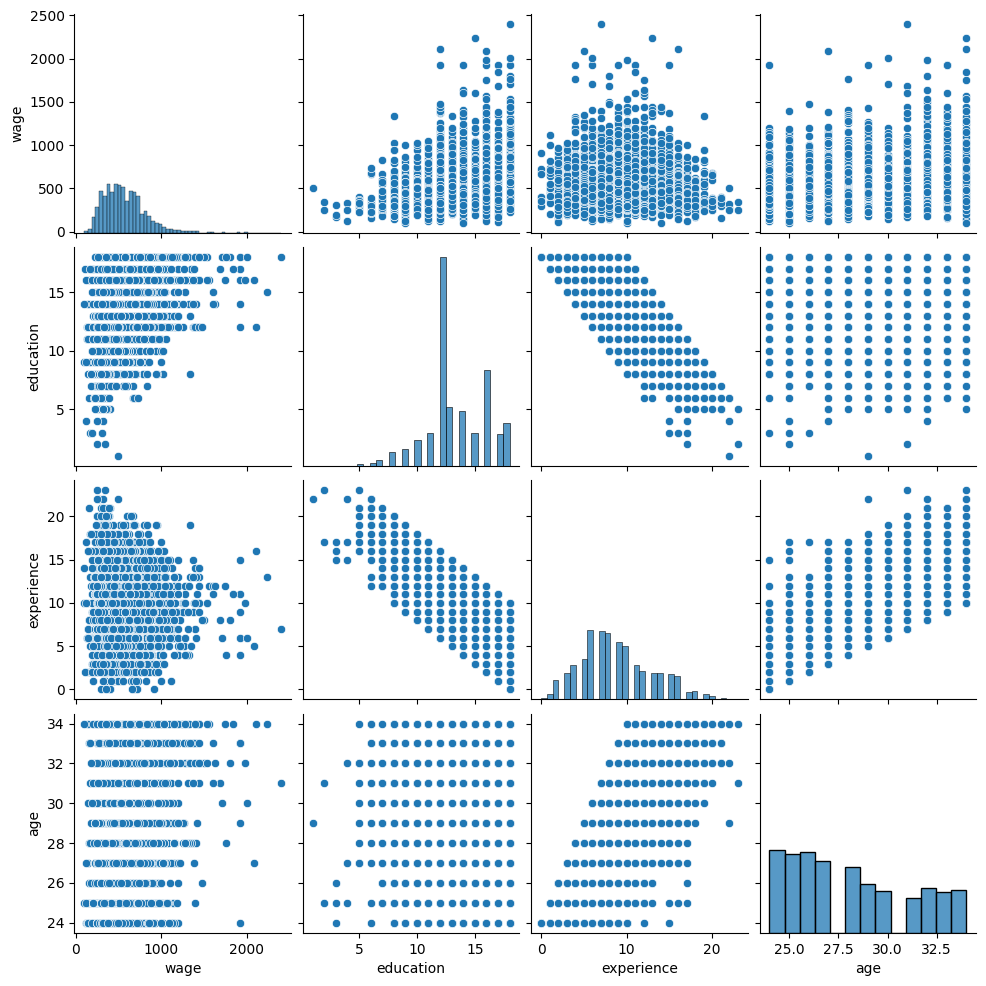

In [100]:
# Correlation matrix
correlation = df[['wage', 'education', 'experience', 'age']].corr()
sns.heatmap(correlation, annot=True)
plt.show()

# Pairplot for selected variables
sns.pairplot(df[['wage', 'education', 'experience', 'age']])
plt.show()


### Transformation Justifications for Regression Analysis

#### 1. **Wage:**
- **Distribution:** The histogram for `wage` shows a right-skewed distribution, which is common for income data where a smaller number of individuals earn disproportionately higher incomes.
- **Transformation Rationale:** A logarithmic transformation (`np.log`) is typically effective in dealing with right-skewed data as it can help stabilize variance and make the data conform more closely to a normal distribution. This transformation will also turn multiplicative relationships into additive ones, which can simplify interpretation in economic models.

#### 2. **Education:**
- **Distribution:** The distribution of `education` shows gaps and spikes, which suggest it is a discrete variable, likely representing completed years of education or the attainment of specific educational levels.
- **Transformation Rationale:** Ordinal or discrete variables like `education` are often best left untransformed if the goal is to interpret the direct effect of each additional unit (e.g., year of education) on the outcome. However, considering polynomial terms (like squared terms) might be helpful if there's a reason to believe the effect of education could accelerate or decelerate after a certain level.

#### 3. **Experience:**
- **Distribution:** `Experience` appears to have a somewhat normal distribution but with potential outliers at higher values.
- **Transformation Rationale:** Given the slight curvature observed in the scatter plots with `wage`, adding a squared term (`experience^2`) might capture any non-linear effects, such as diminishing returns of additional experience on wages.

#### 4. **Age:**
- **Correlation with Experience:** High correlation (0.76) suggesting multicollinearity if both are included in the same model.
- **Transformation Rationale:** Given its correlation with `experience`, it might not be necessary or advisable to include `age` directly if `experience` is in the model unless part of a hypothesis. If used, consider checking for non-linear relationships similarly to `experience`.


In [101]:
import pandas as pd
import numpy as np
from statsmodels.formula.api import ols
from linearmodels.iv import IV2SLS
from scipy import stats  # Import scipy.stats for statistical functions

# Load your dataset
df = pd.read_csv('data/SchoolingReturns.csv')

# Adding squared terms directly to the DataFrame
df['experience_sq'] = df['experience']**2
df['age_sq'] = df['age']**2

# Ensure categorical variables are treated correctly
df['ethnicity'] = df['ethnicity'].astype('category')
df['smsa'] = df['smsa'].astype('category')
df['south'] = df['south'].astype('category')

# Step 1: Fit the OLS Model
ols_formula = 'np.log(wage) ~ education + experience_sq + C(ethnicity) + C(smsa) + C(south)'
model_ols = ols(ols_formula, data=df).fit()

# Step 2: Fit the IV Model
iv_formula = 'np.log(wage) ~ 1 + C(ethnicity) + C(smsa) + C(south) + [education + experience_sq ~ nearcollege + age_sq]'
model_iv = IV2SLS.from_formula(iv_formula, df).fit(cov_type='unadjusted')

# Step 3: Perform the Hausman Test
# Compare residuals between the two models
res_ols = model_ols.resid
res_iv = model_iv.resids

# Compute the difference in residuals
ols_ssr = np.sum(res_ols**2)
iv_ssr = np.sum(res_iv**2)
n = len(df)  # Number of observations
k = model_ols.df_model  # Number of predictors

hausman_stat = (ols_ssr - iv_ssr) / iv_ssr * (n - k) / k
p_value = 1 - stats.f.cdf(hausman_stat, dfn=k, dfd=n-k)

print("Durbin-Wu-Hausman Test Results:")
print(f"Hausman Statistic: {hausman_stat}")
print(f"P-value: {p_value}")

# Step 4: Interpret Results
if p_value < 0.05:
    print("Endogeneity detected. IV model is preferred.")
else:
    print("No significant endogeneity detected. OLS model is sufficient.")

# Step 5: Print Final IV Model Summary if Endogeneity is Detected
if p_value < 0.05:
    print("\nIV Model Summary:")
    print(model_iv.summary)


Durbin-Wu-Hausman Test Results:
Hausman Statistic: -79.967310627073
P-value: 1.0
No significant endogeneity detected. OLS model is sufficient.


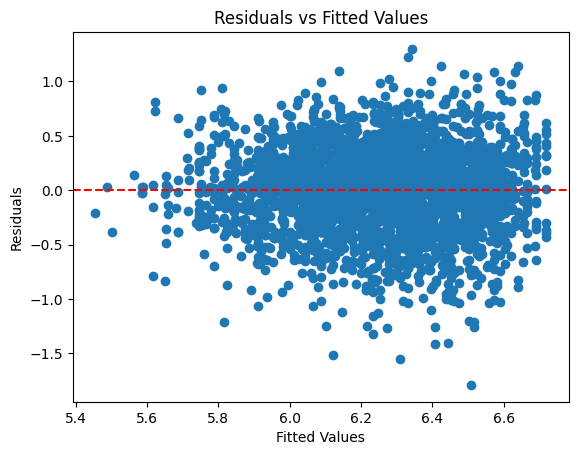

In [102]:
import matplotlib.pyplot as plt

# Residual Plot
plt.scatter(model_ols.fittedvalues, model_ols.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


{'Lagrange multiplier statistic': 9.438195999820909, 'p-value': 0.09281159025402864, 'f-value': 1.8898021527611137, 'f p-value': 0.09278772522340338}


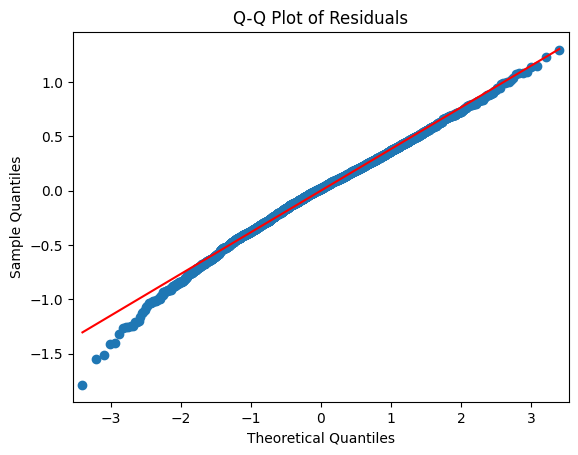

                Variable        VIF
0              Intercept  61.558336
1  C(ethnicity)[T.other]   1.195587
2        C(smsa)[T.True]   1.066442
3       C(south)[T.True]   1.180647
4              education   1.803791
5          experience_sq   1.668483


In [103]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_ols.resid, model_ols.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))

# Interpret the p-value: if p-value < 0.05, heteroscedasticity is present.

import statsmodels.api as sm
import matplotlib.pyplot as plt

sm.qqplot(model_ols.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()


from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame for VIF
vif_data = pd.DataFrame()
vif_data['Variable'] = model_ols.model.exog_names  # Use all variables in the model
vif_data['VIF'] = [variance_inflation_factor(model_ols.model.exog, i) for i in range(len(model_ols.model.exog_names))]

print(vif_data)


OLS Model Summary:
                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     203.6
Date:                Sat, 21 Dec 2024   Prob (F-statistic):          2.23e-187
Time:                        19:55:40   Log-Likelihood:                -1385.9
No. Observations:                3010   AIC:                             2784.
Df Residuals:                    3004   BIC:                             2820.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept  

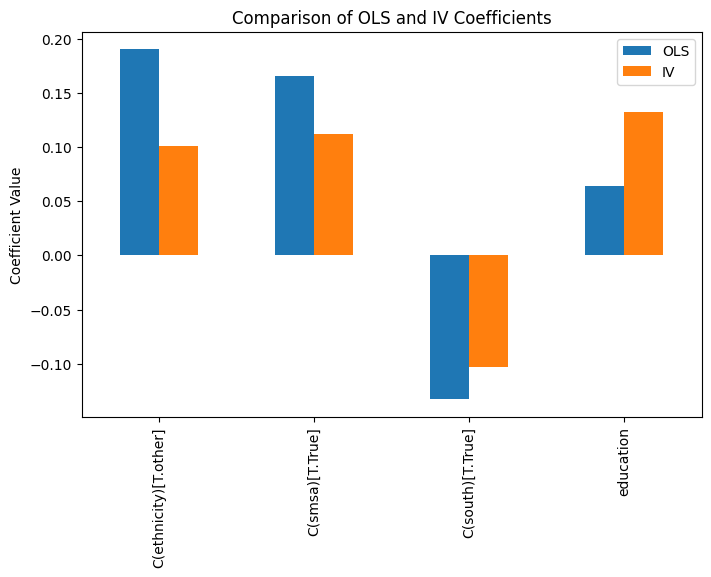

In [104]:
import pandas as pd
from statsmodels.formula.api import ols
from linearmodels.iv import IV2SLS
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('data/SchoolingReturns.csv')

# Adding squared terms directly to the DataFrame
df['experience_sq'] = df['experience']**2
df['age_sq'] = df['age']**2

# Ensure categorical variables are treated correctly
df['ethnicity'] = df['ethnicity'].astype('category')
df['smsa'] = df['smsa'].astype('category')
df['south'] = df['south'].astype('category')

# OLS model using statsmodels
formula_ols = 'np.log(wage) ~ education + experience_sq + C(ethnicity) + C(smsa) + C(south)'
model_ols = ols(formula_ols, data=df).fit()
print("OLS Model Summary:")
print(model_ols.summary())

# IV model using linearmodels
iv_formula = 'np.log(wage) ~ 1 + C(ethnicity) + C(smsa) + C(south) + [education + experience_sq ~ nearcollege + age_sq]'
model_iv = IV2SLS.from_formula(iv_formula, df).fit(cov_type='unadjusted')
print("\nIV Model Summary:")
print(model_iv.summary)

# Plotting coefficients, correctly identifying categorical expansions
fig, ax = plt.subplots(figsize=(8, 5))
ols_keys = [key for key in model_ols.params.keys() if 'education' in key or 'C(ethnicity)' in key or 'C(smsa)' in key or 'C(south)' in key]
iv_keys = [key for key in model_iv.params.keys() if 'education' in key or 'C(ethnicity)' in key or 'C(smsa)' in key or 'C(south)' in key]
coefficients = pd.DataFrame({
    'OLS': model_ols.params[ols_keys],
    'IV': model_iv.params[iv_keys]
})
coefficients.plot(kind='bar', ax=ax)
ax.set_title('Comparison of OLS and IV Coefficients')
ax.set_ylabel('Coefficient Value')
plt.show()


# Explanation of OLS and IV Model Results

## **OLS Model Summary**

### Model Fit:
- **R-squared**: 0.253
  - About 25.3% of the variance in `np.log(wage)` is explained by the predictors.
- **AIC**: 2784 and **BIC**: 2820
  - Lower values indicate better model fit, but these metrics are mainly useful for comparing models.

### Significant Predictors:
- All predictors are statistically significant (**p < 0.05**).
- **Interpretation of Coefficients**:
  - **Intercept (5.0494)**: Baseline log wage for the reference categories of `ethnicity`, `smsa`, and `south`.
  - **C(ethnicity)[T.other] (0.1904)**: Being in the "other" ethnicity group increases log wage by 0.1904 compared to the reference ethnicity group.
  - **C(smsa)[T.True] (0.1658)**: Living in an SMSA increases log wage by 0.1658 compared to not living in an SMSA.
  - **C(south)[T.True] (-0.1329)**: Living in the South decreases log wage by 0.1329 compared to not living in the South.
  - **education (0.0645)**: Each additional year of education increases log wage by 0.0645.
  - **experience_sq (0.0015)**: A slight positive effect of squared experience on log wage.

### Diagnostics:
- **Durbin-Watson (1.865)**: No strong evidence of autocorrelation in residuals.
- **Condition Number (1.01e+03)**: Indicates potential multicollinearity issues, particularly with categorical predictors like `ethnicity`.

---

## **IV Model Summary**

### Model Fit:
- **R-squared**: 0.1385
  - About 13.85% of the variance in `np.log(wage)` is explained by the IV model, which is lower than the OLS model.
- **F-statistic**: 837.71 (p < 0.0001)
  - The model is statistically significant overall.

### Significant Predictors:
- Most predictors are statistically significant (**p < 0.05**), except:
  - **C(ethnicity)[T.other]**: No longer significant (**p = 0.1963**).
- **Interpretation of Coefficients**:
  - **Intercept (4.1968)**: Baseline log wage for the reference categories.
  - **C(ethnicity)[T.other] (0.1014)**: Not statistically significant.
  - **C(smsa)[T.True] (0.1120)**: Living in an SMSA increases log wage by 0.1120.
  - **C(south)[T.True] (-0.1034)**: Living in the South decreases log wage by 0.1034.
  - **education (0.1324)**: Each additional year of education increases log wage by 0.1324.
  - **experience_sq (0.0020)**: A slight positive effect of squared experience on log wage.

### Instrumental Variables:
- **Endogenous Variables**: `education` and `experience_sq`.
- **Instruments**: `nearcollege` and `age_sq`.
  - Assumed to:
    1. Be strongly correlated with the endogenous variables.
    2. Not be correlated with the error term.

---

## **Comparison of OLS and IV Models**

1. **Differences in Coefficients**:
   - The coefficient for `education` is higher in the IV model (0.1324) compared to OLS (0.0645), suggesting OLS underestimates the true effect of education, likely due to endogeneity.
   - The coefficient for `experience_sq` is slightly higher in the IV model (0.0020) compared to OLS (0.0015).

2. **R-squared**:
   - The OLS model has a higher R-squared (0.253) compared to the IV model (0.1385), as expected since IV models often sacrifice explanatory power for consistency.

3. **Statistical Significance**:
   - Most predictors remain significant in both models, but the significance of `C(ethnicity)[T.other]` diminishes in the IV model.

4. **Why Use IV?**
   - IV is used to address potential endogeneity in the OLS model. Although the IV model explains less variance, it provides more reliable estimates for endogenous variables like `education`.

---

## **Final Recommendations**

1. **Interpret Results**:
   - If the Durbin-Wu-Hausman test indicates endogeneity, rely on the IV model for interpreting the effect of `education` and `experience_sq`.
   - Otherwise, use the OLS model for its higher explanatory power.

2. **Address Multicollinearity**:
   - The high VIF for `C(ethnicity)[T.other]` in the OLS model suggests severe multicollinearity. Consider:
     - Removing or combining categories in `ethnicity`.
     - Investigating correlations among categorical variables.


# Simultaneous Equation Models

## **Overview**
- **Simultaneous Equation Models**:
  - These models involve multiple equations with dependent variables that are interlinked.
  - The dependent variable in one equation is often the independent variable in another, leading to mutual interdependence.

- **Key Issue**:
  - In such models, the error terms are correlated with the regressors, violating the assumptions of Ordinary Least Squares (OLS).
  - This correlation results in biased and inconsistent coefficient estimates if OLS is applied.

---

## **Supply and Demand Model Example**
- Consider the supply and demand for a good:
  - **Equation 6**: Demand Equation  
    $$
    Q_d = \alpha + \beta P + \gamma S + u
    $$
    - $ Q_d $: Quantity demanded
    - $ P $: Price of the good
    - $ S $: Price of a substitute good
    - $ u $: Error term
  
  - **Equation 7**: Supply Equation  
    $$
    Q_s = \lambda + \mu P + k T + \nu
    $$
    - $ Q_s $: Quantity supplied
    - $ T $: Technology variable
    - $ \nu $: Error term
  
  - **Equation 8**: Market Equilibrium  
    $$
    Q_d = Q_s
    $$

- **Endogenous Variables**:
  - $ P $ (price) and $ Q $ (quantity) are determined within the system (interdependent).
  
- **Exogenous Variables**:
  - $ S $ (substitute good price) and $ T $ (technology) are external to the system and not influenced by the dependent variables.

---

## **Structural and Reduced Form Models**
- **Structural Form**:
  - The original equations of the system that include endogenous variables on the right-hand side.
  - Example:
    $$
    Q = \alpha + \beta P + \gamma S + u
    $$
    $$
    Q = \lambda + \mu P + k T + \nu
    $$

- **Reduced Form**:
  - Solves for each endogenous variable ($ P $ and $ Q $) as a function of only exogenous variables.
  - Example:
    $$
    P = \pi_{10} + \pi_{11} T + \pi_{12} S + \epsilon_1
    $$
    $$
    Q = \pi_{20} + \pi_{21} T + \pi_{22} S + \epsilon_2
    $$

- **Why Use the Reduced Form?**
  - OLS can be applied to the reduced form because the regressors (exogenous variables) are uncorrelated with the error terms.

---

## **Key Insights**
1. **Endogeneity**:
   - The interdependence of price ($ P $) and quantity ($ Q $) makes them endogenous.
   - Applying OLS directly to structural equations will produce biased coefficients.

2. **Estimation of Reduced Form**:
   - Solve the structural equations to express endogenous variables ($ P $ and $ Q $) as functions of exogenous variables ($ S $ and $ T $).
   - Use OLS to estimate the reduced-form equations, ensuring consistency and unbiasedness.

---

## **Steps to Address the Problem**
1. **Identify Endogenous and Exogenous Variables**:
   - Endogenous: Variables determined within the system (e.g., $ P $, $ Q $).
   - Exogenous: External variables that influence the system but are not influenced by it (e.g., $ S $, $ T $).

2. **Derive the Reduced Form**:
   - Solve the structural equations to express endogenous variables as functions of exogenous variables.

3. **Estimate the Reduced Form**:
   - Use OLS to estimate the coefficients of the reduced-form equations.
   - Example:
     $$
     P = \pi_{10} + \pi_{11} T + \pi_{12} S + \epsilon_1
     $$
     $$
     Q = \pi_{20} + \pi_{21} T + \pi_{22} S + \epsilon_2
     $$

4. **Validate Model Assumptions**:
   - Ensure that the instruments (exogenous variables) are valid:
     - **Relevance**: Strongly correlated with endogenous variables.
     - **Exogeneity**: Uncorrelated with error terms.

---

## **Implications**
- Structural equations cannot be estimated using OLS due to endogeneity between regressors and error terms.
- Reduced-form equations overcome this issue by relying solely on exogenous variables.
- Proper estimation of simultaneous equations requires solving for reduced forms or applying advanced techniques like Two-Stage Least Squares (2SLS) if exogenous variables are insufficient.


# Identification of Parameters: Demand and Supply

## **Overview**
- **Identification** refers to the possibility of estimating the parameters of interest ($\alpha, \beta, \lambda, \mu$) from the observed data.
- In econometrics, identification ensures that the structural parameters can be deduced from the distribution of observed variables.

---

## **Example: Supply and Demand Model**
1. **Demand Equation**:
   $$
   Q_d = \alpha + \beta P
   $$
   - $ Q_d $: Quantity demanded
   - $ P $: Price
   - $\beta < 0$: Higher prices reduce demand.
   - $\alpha > 0$: Base demand when the price is zero.

2. **Supply Equation**:
   $$
   Q_s = \lambda + \mu P
   $$
   - $ Q_s $: Quantity supplied
   - $\mu > 0$: Higher prices increase supply.
   - $\lambda$: Base supply at zero price.

3. **Market Equilibrium**:
   $$
   Q_s = Q_d
   $$
   - Ensures that supply equals demand.

4. **Structural Model Issues**:
   - The observed $Q$ and $P$ cannot differentiate between the demand parameters ($\alpha, \beta$) and supply parameters ($\lambda, \mu$).
   - Both equations look the same, making it impossible to identify the structural parameters.

---

## **Identification Problems**
- The parameters can only be identified if the structural equations satisfy specific conditions.
- **Three Scenarios**:
  1. **Unidentified**:
     - Structural parameters cannot be obtained from reduced-form estimates.
  2. **Just Identified**:
     - One unique set of structural parameters can be recovered.
  3. **Overidentified**:
     - More than one set of structural parameters can be derived.

---

## **Conditions for Identification**
### **1. The Order Condition**
- **Definition**: Determines if the number of excluded variables in an equation is sufficient for identification.
- **Rule**:
  - Let $ G $ = Total number of structural equations.
  - An equation is:
    - **Underidentified**: If fewer than $ G-1 $ variables are excluded.
    - **Just Identified**: If exactly $ G-1 $ variables are excluded.
    - **Overidentified**: If more than $ G-1 $ variables are excluded.
- **Limitation**: The order condition is necessary but not sufficient for identification.

---

### **2. The Rank Condition**
- **Definition**: Ensures that the system satisfies a necessary and sufficient condition for identification.
- **Approach**:
  - Represent the structural model in matrix form.
  - Examine the rank of the coefficient matrix for excluded variables.
- **Key Advantage**: Unlike the order condition, the rank condition is both necessary and sufficient.

---

## **Key Takeaways**
- **Unidentified Equations**: Cannot estimate structural parameters.
- **Identified Equations**: Can estimate one unique set of structural parameters.
- **Overidentified Equations**: Multiple sets of structural parameters are possible, requiring further analysis.
- **Importance of Rank Condition**:
  - Provides definitive answers for identification.
  - Requires matrix algebra but is more reliable than the order condition.


# Choosing Between OLS, ILS, 2SLS, or IV

## **1. Ordinary Least Squares (OLS)**
### **Use When:**
- There is **no endogeneity** in the model.
  - Endogeneity arises when a regressor is correlated with the error term due to omitted variables, measurement error, or simultaneous causality.
- The model satisfies standard OLS assumptions:
  - No correlation between regressors and errors.
  - Homoscedasticity and no multicollinearity.

### **Why OLS?**
- Provides **unbiased**, **consistent**, and **efficient** estimates if assumptions are met.
- Ideal for simple regression models or initial hypothesis testing.

---

## **2. Indirect Least Squares (ILS)**
### **Use When:**
- The system of equations is **exactly identified** (number of excluded exogenous variables equals the number of endogenous variables).
- You need to estimate structural parameters **indirectly** via reduced-form equations.

### **Why ILS?**
- Suitable for **exactly identified systems** but cannot handle over-identified systems.
- Rarely used in practice because 2SLS or IV methods are more flexible.

---

## **3. Two-Stage Least Squares (2SLS)**
### **Use When:**
- There is **endogeneity** in the model.
- You have valid **instrumental variables (IVs)**:
  1. **Relevance**: Instruments must be strongly correlated with endogenous variables.
  2. **Exogeneity**: Instruments must not be correlated with the error term.
- The system is **just identified** or **over-identified**.

### **Why 2SLS?**
- Addresses endogeneity by isolating exogenous variation in endogenous variables through instruments.
- Suitable for systems with multiple endogenous variables.

---

## **4. Instrumental Variables (IV)**
### **Use When:**
- Similar conditions to 2SLS: **endogeneity** and availability of valid instruments.
- Focus is on addressing a **specific endogenous variable** with a single instrument.

### **Why IV?**
- Simpler and more targeted than 2SLS when working with fewer endogenous variables and instruments.

---

## **Key Considerations**
### **1. Check for Endogeneity**
- Use diagnostic tests to detect endogeneity:- **Durbin-Wu-Hausman Test**

---

### **2. Identify Instruments**
- Instruments must satisfy two key criteria:
  1. **Relevance**: Strong correlation with endogenous variables (check F-statistics in the first stage).
  2. **Exogeneity**: No correlation with error terms (use Hansen's J test for overidentification).

---

### **3. Model Identification**
- Use the **order condition** and **rank condition**:
  - **Order Condition**: Ensure enough excluded variables for identification.
  - **Rank Condition**: Ensure instruments provide independent variation.

---

## **Practical Workflow**
1. **Start with OLS**:
   - Estimate the model and check for violations like endogeneity or multicollinearity.
2. **Test for Endogeneity**:
   - Use diagnostic tests (e.g., Durbin-Wu-Hausman test).
3. **Switch to IV or 2SLS if Necessary**:
   - Identify valid instruments and re-estimate the model.
4. **Validate Instruments**:
   - Perform relevance and exogeneity tests for instruments.
5. **Compare Models**:
   - Compare OLS and IV/2SLS results to confirm improvements.

---

## **Key Differences in Application**
| **Method** | **When to Use**                     | **Advantages**            | **Disadvantages**         |
|------------|-------------------------------------|---------------------------|---------------------------|
| **OLS**    | No endogeneity                      | Simple, efficient         | Biased if endogeneity exists |
| **ILS**    | Exactly identified systems          | Easy to apply             | Rarely applicable         |
| **2SLS**   | Endogeneity + Instruments           | Handles multiple equations | Requires strong instruments |
| **IV**     | Single endogenous variable          | Focused solution          | Limited to specific scenarios |

---
## **Differences of R-squared**
| **Measure**           | **Definition**                                                                 | **Interpretation**                                                                                                         | **Relevant For**                           |
|------------------------|-------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------|---------------------------------------------|
| **R-Squared (Within)** | Measures how well the model explains the variation **within entities** over time. | High R-squared (Within) suggests the independent variables effectively explain changes within each entity over time.        | Fixed Effects, Random Effects              |
| **R-Squared (Between)**| Measures how well the model explains the variation **between entities** (using averages). | High R-squared (Between) suggests the independent variables explain differences between entities effectively.               | Random Effects                              |
| **R-Squared (Overall)**| Combines within-entity and between-entity variations to measure total explained variance. | High R-squared (Overall) indicates the model captures overall variation across time and entities.                          | Random Effects, General Panel Data Models  |
| **Standard R-Squared** | Measures total variation explained by the independent variables in pooled data. | Indicates the proportion of variance explained without accounting for entity or time effects.                              | Pooled OLS                                  |


# Estimate of the Structural Model using Fulton Fish Data

In [105]:
import pandas as pd
import statsmodels.api as sm
from linearmodels.system import IVSystemGMM

# Load the data
df = pd.read_csv('data/fultonfish.csv')  # Replace with the path to your CSV file

# Reduced "Q" equation for the fultonfish example
X_q = df[['mon', 'tues', 'wed', 'thurs', 'speed2']]
X_q = sm.add_constant(X_q)
y_q = df['lavgprc']  # Adjust target variable as per the dataset
fishQ_ols = sm.OLS(y_q, X_q).fit()
print("Reduced 'Q' equation:")
print(fishQ_ols.summary())

# Reduced "P" equation for the fultonfish example
X_p = df[['mon', 'tues', 'wed', 'thurs', 'wave2']]
X_p = sm.add_constant(X_p)
y_p = df['ltotqty']  # Adjust target variable as per the dataset
fishP_ols = sm.OLS(y_p, X_p).fit()
print("\nReduced 'P' equation:")
print(fishP_ols.summary())

# 2SLS - Simultaneous Equations Model
# Define the equations using formulas
equations = {
    'Demand': 'lavgprc ~ ltotqty + mon + tues + wed + thurs',
    'Supply': 'ltotqty ~ lavgprc + speed2 + wave2'
}

# Fit the system using IVSystemGMM
fish_sys = IVSystemGMM.from_formula(equations, data=df)
fish_sys_results = fish_sys.fit(cov_type='unadjusted')

# Display the results
print("\n2SLS System Results:")
print(fish_sys_results.summary)


Reduced 'Q' equation:
                            OLS Regression Results                            
Dep. Variable:                lavgprc   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     1.232
Date:                Sat, 21 Dec 2024   Prob (F-statistic):              0.301
Time:                        19:55:40   Log-Likelihood:                -46.179
No. Observations:                  97   AIC:                             104.4
Df Residuals:                      91   BIC:                             119.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5643      0.1

# **Explanation of Results**

---

## **1. Reduced 'Q' Equation (OLS Results)**

This equation estimates the relationship between `lavgprc` (log average price) and weekday indicators (`mon`, `tues`, `wed`, `thurs`) along with the weather variable `speed2`.

### **Key Metrics:**
- **R-squared:** 0.063 (6.3% of the variation in `lavgprc` is explained by the model).
  - Indicates a weak fit.
- **Adjusted R-squared:** 0.012 (accounts for the number of predictors).
- **AIC/BIC:** High values, signaling potential model fit issues.
- **F-statistic (1.232, p = 0.301):** The model is not statistically significant overall.

### **Coefficients:**
- **`speed2` (p = 0.023):** Statistically significant. A unit increase in `speed2` increases `lavgprc` by 0.0249 on average.
- **Weekday indicators:** None are statistically significant, meaning they do not significantly predict `lavgprc`.

### **Conclusion:**
The model provides limited explanatory power for `lavgprc`. Only `speed2` has a statistically significant impact.

---

## **2. Reduced 'P' Equation (OLS Results)**

This equation estimates the relationship between `ltotqty` (log total quantity) and weekday indicators along with the weather variable `wave2`.

### **Key Metrics:**
- **R-squared:** 0.188 (18.8% of the variation in `ltotqty` is explained).
  - Indicates a weak-to-moderate fit.
- **Adjusted R-squared:** 0.144 (lower than R-squared, suggesting potential unnecessary predictors).
- **F-statistic (4.219, p = 0.00171):** The model is statistically significant.

### **Coefficients:**
- **`tues` (-0.6931, p = 0.003) and `wed` (-0.5957, p = 0.009):**
  - Statistically significant; these days have lower `ltotqty` compared to the baseline.
- **`wave2` (-0.0947, p = 0.023):** Statistically significant. An increase in wave height reduces `ltotqty`.

### **Conclusion:**
`tues`, `wed`, and `wave2` are significant predictors of `ltotqty`. The model fits slightly better than the reduced 'Q' equation.

---

## **3. 2SLS System Results**

This simultaneous equation model captures the interdependent relationship between `lavgprc` (demand) and `ltotqty` (supply).

### **Demand Equation (Dependent Variable: `lavgprc`):**
- **`ltotqty` (-0.0374, p = 0.0003):**
  - Statistically significant. A unit increase in `ltotqty` decreases `lavgprc` by 0.0374 on average.
- **Weekday indicators (`mon`, `tues`, `wed`, `thurs`):**
  - None are significant predictors.

### **Supply Equation (Dependent Variable: `ltotqty`):**
- **`lavgprc` (-3.3948, p < 0.001):**
  - Statistically significant. An increase in `lavgprc` decreases `ltotqty`, suggesting price increases lead to lower supply quantities.
- **`speed2` (0.2235, p = 0.0002) and `wave2` (0.8008, p < 0.001):**
  - Statistically significant. Weather conditions significantly impact supply.

### **Model Fit Metrics:**
- **Overall R-squared (0.9269):** Strong fit for the system as a whole.
- **McElroy’s R-squared (-0.6684):** Indicates potential issues with identifying the structural relationships.
- **Weight Estimator:** Robust weighting used for heteroskedasticity adjustment.

---

## **Key Takeaways:**
1. **Reduced Form Equations:**
   - The reduced 'Q' equation has limited explanatory power with only `speed2` being significant.
   - The reduced 'P' equation performs better, with `wave2`, `tues`, and `wed` showing significant effects.

2. **2SLS System Results:**
   - The interdependence between price and quantity (`lavgprc` and `ltotqty`) is well captured.
   - Weather variables (`speed2`, `wave2`) significantly impact supply.

3. **Conclusion:**
   - The system's overall fit is good, but individual equation results highlight weaknesses in explaining demand (`lavgprc`).


# Panel Data Analysis

## What is Panel Data?
Panel data, also known as longitudinal data, refers to datasets that combine **time series and cross-sectional dimensions**. These datasets involve repeated observations of the same individuals or entities over time. 

### Key Characteristics:
1. **Repeated Observations**: Panel data measures the same entities (e.g., individuals, firms, countries) across multiple time periods.
2. **Balanced vs. Unbalanced Panels**:
   - **Balanced Panels**: Same set of observations at every time point.
   - **Unbalanced Panels**: Some observations are missing or differ across time points.

---

## Econometric Setup
The econometric model for panel data can be written as:

$$
y_{it} = \alpha + \beta x_{it} + \epsilon_{it}
$$

Where:
- $ y_{it} $: Dependent variable for individual $ i $ at time $ t $
- $ \alpha $: Intercept term
- $ \beta $: Coefficient(s) for the explanatory variable(s)
- $ x_{it} $: Explanatory variables for individual $ i $ at time $ t $
- $ \epsilon_{it} $: Error term

---

## Advantages of Panel Data
1. **Heterogeneity Accounting**:
   - Panel data allows us to account for individual-specific characteristics (heterogeneity) that might be omitted in other methods.
   - This reduces omitted variable bias.

2. **Dynamic Analysis**:
   - Panel data enables the study of how variables and relationships evolve over time.

3. **Broader Analysis Scope**:
   - A wider range of research questions can be addressed compared to purely cross-sectional or time-series data.

4. **Improved Model Precision**:
   - Structuring panel models correctly helps remove biases from omitted variables.

---

## Techniques for Panel Data Analysis
### Simple Pooled Regression
- The simplest way to analyze panel data is to pool all observations together and estimate a single regression using OLS:
  $$
  y_{it} = \alpha + \beta x_{it} + \epsilon_{it}
  $$
- **Assumption**: All observations are homogenous, with no unobserved heterogeneity.
- **Limitation**: Ignores individual-specific effects, leading to potential bias.

---

## Types of Panel Data
### **Balanced Panels**:
- Equal number of observations for each individual over time.
- Example: All firms in a study are observed yearly for five years.

### **Unbalanced Panels**:
- Varying number of observations across individuals or entities.
- Example: Some firms are observed for three years, while others are observed for five years.
- **Note**: Most software automatically handles missing observations in unbalanced panels.

---

## Features of Panel Data Analysis
1. **Combines Time and Cross-Sectional Dimensions**:
   - Provides richer datasets for analysis.
2. **Checks for Heterogeneity**:
   - Panel data allows the detection of unobserved individual effects.
3. **Handles Omitted Variable Bias**:
   - Proper structuring can mitigate biases in regression results.

---

## Conclusion
Panel data provides a powerful framework to study how variables interact over time while accounting for individual-specific effects. Whether the dataset is balanced or unbalanced, panel techniques can offer deeper insights compared to purely cross-sectional or time-series data alone.



## Advantages of Panel Data

1. **Accounts for Individual Heterogeneity**:
   - Panel data allows the inclusion of individual-specific characteristics (unobserved heterogeneity) that could bias results in cross-sectional or time-series analyses.
   - Reduces omitted variable bias by controlling for these characteristics.

2. **Dynamic Analysis**:
   - Enables the study of changes in variables and relationships over time.
   - Captures temporal effects that are impossible to analyze with cross-sectional data.

3. **Increases Efficiency and Precision**:
   - By combining time-series and cross-sectional dimensions, panel data provides more data points, enhancing statistical power.

4. **Addresses Complex Relationships**:
   - Facilitates the study of relationships that vary across individuals and over time.

5. **Mitigates Multicollinearity**:
   - The variability across individuals and time reduces multicollinearity among predictors.

6. **Tracks Time-Invariant Variables**:
   - Fixed-effects models can help isolate the effects of variables that do not change over time, such as geographic or demographic factors.

7. **Allows for Broad Research Questions**:
   - Panel data supports the exploration of wide-ranging questions that are unanswerable using either time-series or cross-sectional data alone.

---

## Conditions to Use Panel Data

To effectively use panel data, the following conditions should be met:

1. **Repeated Observations**:
   - The dataset should include repeated measurements for the same entities (e.g., individuals, firms, countries) over time.

2. **Balanced or Unbalanced Panel**:
   - A balanced panel has the same number of observations for all entities at each time point.
   - An unbalanced panel is acceptable but requires methods that can handle missing or varying observations across entities.

3. **Cross-Sectional and Temporal Dimensions**:
   - The dataset should combine cross-sectional data (e.g., different individuals) with time-series data (e.g., observations across years).

4. **Sufficient Variation in Data**:
   - There must be adequate variability in both cross-sectional and temporal dimensions to enable robust estimation.

5. **No Perfect Collinearity**:
   - The explanatory variables should not exhibit perfect collinearity, which could affect estimation.

6. **Correct Model Specification**:
   - The econometric model should reflect the underlying data structure and account for heterogeneity across entities and over time (e.g., fixed-effects or random-effects models).

7. **Independence Assumption**:
   - The errors should be independent across entities and over time unless specifically modeled (e.g., with cluster-robust standard errors).

8. **Identification of Time Effects**:
   - Consider whether time-fixed effects are necessary to account for time-specific shocks or trends common to all entities.

---

## Key Considerations
- **Balanced vs. Unbalanced Panels**:
  - Ensure the estimation technique accommodates the panel structure.
- **Heterogeneity**:
  - Use fixed-effects or random-effects models depending on whether individual-specific effects are correlated with explanatory variables.
- **Omitted Variable Bias**:
  - Leverage panel data techniques to control for unobserved factors.
- **Dynamic Relationships**:
  - If analyzing temporal effects, ensure the data spans sufficient time points to capture changes.


# Notes on Panel Data Models

## 1. Pooled OLS Model
- **Definition**:
  - A panel data regression model that assumes the relationship between the dependent and independent variables is the same for all entities and over all time periods.
  - Ignores unobserved heterogeneity across entities or over time.
  
- **Key Assumptions**:
  1. **No unobserved heterogeneity**: All entities are homogeneous or any unobserved differences are uncorrelated with the independent variables.
  2. **Error term assumptions**: Errors are homoscedastic and uncorrelated across entities and time.

- **Advantages**:
  - Simple to estimate.
  - Requires fewer computational resources.

- **Disadvantages**:
  - Ignores individual-specific and time-specific effects, which can lead to biased results if unobserved heterogeneity exists.

- **When to Use**:
  - When the data has no significant unobserved heterogeneity or when unobserved heterogeneity is uncorrelated with independent variables.

---

## 2. Fixed Effects (FE) Model
- **Definition**:
  - A panel data model that controls for unobserved heterogeneity by allowing each entity to have its own intercept (entity-specific effects).
  - Captures time-invariant characteristics of entities (e.g., cultural, institutional, or structural differences).

- **Key Assumptions**:
  1. Unobserved effects are **correlated** with independent variables.
  2. Time-invariant effects (entity or individual effects) can be removed through de-meaning or differencing.

- **Advantages**:
  - Controls for all time-invariant factors that differ across entities.
  - Reduces omitted variable bias caused by unobserved heterogeneity.

- **Disadvantages**:
  - Cannot estimate the effects of time-invariant variables (e.g., gender, region) because they are absorbed into the entity-specific effects.
  - Requires variation within entities over time.

- **When to Use**:
  - When unobserved heterogeneity exists and is correlated with independent variables.

---

## 3. Random Effects (RE) Model
- **Definition**:
  - A panel data model that assumes unobserved heterogeneity is **uncorrelated** with independent variables.
  - Treats entity-specific effects as random variables drawn from a common distribution.

- **Key Assumptions**:
  1. Unobserved effects are **uncorrelated** with independent variables.
  2. Errors are homoscedastic and uncorrelated across entities and time.

- **Advantages**:
  - Allows estimation of time-invariant variables.
  - More efficient than fixed effects if the assumptions hold.

- **Disadvantages**:
  - Biased results if unobserved heterogeneity is correlated with independent variables.

- **When to Use**:
  - When unobserved effects are believed to be random and uncorrelated with independent variables.

---

## 4. Choosing Between Models
- **Hausman Test**:
  - A statistical test to determine whether to use a fixed effects or random effects model.
  - **Null Hypothesis**: Random effects are appropriate (unobserved effects are uncorrelated with independent variables).
  - **Alternative Hypothesis**: Fixed effects are appropriate (unobserved effects are correlated with independent variables).

---

## 5. Summary Table

| Feature             | Pooled OLS      | Fixed Effects (FE) | Random Effects (RE) |
|---------------------|-----------------|---------------------|---------------------|
| **Unobserved Effects** | Ignored          | Controlled (Correlated) | Controlled (Uncorrelated) |
| **Time-Invariant Variables** | Can estimate   | Cannot estimate       | Can estimate       |
| **Efficiency**      | High            | Moderate            | High (if assumptions hold) |
| **Bias**            | High (if heterogeneity exists) | Low                | High (if assumptions fail) |
| **When to Use**     | No unobserved heterogeneity | Correlated heterogeneity | Uncorrelated heterogeneity |



In [106]:
import numpy as np
import pandas as pd
from linearmodels.panel import PanelOLS, compare

# Load data
df = pd.read_excel("data/solow.xlsx")

# Ensure data is in long format
df = df.set_index(['id', 'year'])

# Define the formula
form = 'lny ~ lnndg + lns'

# (1) OLS model (pooling), with and without robust standard errors
pooled_ols = PanelOLS.from_formula(form, data=df)
pooled_ols_results = pooled_ols.fit(cov_type='robust')
print("Pooled OLS Results with Robust Errors:")
print(pooled_ols_results)

# (2) Fixed Effects Model (Within Estimator), with and without robust standard errors
fixed_effects = PanelOLS.from_formula(form + ' + EntityEffects', data=df)
fixed_effects_results = fixed_effects.fit(cov_type='robust')
print("Fixed Effects Results with Robust Errors:")
print(fixed_effects_results)

# Poolability Test (Test if OLS is better than Fixed Effects)
pooled_vs_fixed = compare({'Pooled OLS': pooled_ols_results, 'Fixed Effects': fixed_effects_results})
print("Poolability Test (Pooled OLS vs. Fixed Effects):")
print(pooled_vs_fixed)

# Custom Wald Test
def wald_test(model, hypothesis):
    params = model.params
    cov = model.cov
    R = np.zeros((1, len(params)))  # Single-row hypothesis matrix
    for i, var in enumerate(hypothesis):
        R[0, params.index.get_loc(var)] = 1  # Set 1 for the variable to test
    q = np.zeros(R.shape[0])  # Test value
    diff = R @ params - q
    stat = diff.T @ np.linalg.inv(R @ cov @ R.T) @ diff
    df = R.shape[0]
    return stat, df

# Example: Testing if 'lns = lnndg'
hypothesis = ['lns', 'lnndg']
ols_stat, ols_df = wald_test(pooled_ols_results, hypothesis)
fixed_stat, fixed_df = wald_test(fixed_effects_results, hypothesis)

print("Wald Test for OLS Model:")
print(f"Statistic: {ols_stat}, Degrees of Freedom: {ols_df}")

print("Wald Test for Fixed Effects Model:")
print(f"Statistic: {fixed_stat}, Degrees of Freedom: {fixed_df}")


Pooled OLS Results with Robust Errors:
                          PanelOLS Estimation Summary                           
Dep. Variable:                    lny   R-squared:                        0.9724
Estimator:                   PanelOLS   R-squared (Between):              0.9786
No. Observations:                1229   R-squared (Within):              -6.0488
Date:                Sat, Dec 21 2024   R-squared (Overall):              0.9724
Time:                        19:55:40   Log-likelihood                   -2227.1
Cov. Estimator:                Robust                                           
                                        F-statistic:                   2.158e+04
Entities:                         164   P-value                           0.0000
Avg Obs:                       7.4939   Distribution:                  F(2,1227)
Min Obs:                       2.0000                                           
Max Obs:                       9.0000   F-statistic (robust):         

c:\Users\moeth\miniconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\moeth\miniconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


# Results Explanation

## **Pooled OLS Results with Robust Errors**
### Key Insights:
1. **R-squared**: 
   - Overall: **0.9724** - Indicates that 97.24% of the variation in `lny` is explained by `lnndg` and `lns`.
   - Between: **0.9786** - Measures the fit across entities.
   - Within: **-6.0488** - Not meaningful in pooled OLS; it measures fit over time within entities.

2. **F-statistic**: **2.158e+04 (P-value = 0.0000)** - Indicates the model is statistically significant.

3. **Parameter Estimates**:
   - **lnndg**: Coefficient = **0.4336**, significant at the 1% level (P-value = 0.0007). Suggests a positive relationship with `lny`.
   - **lns**: Coefficient = **2.6152**, highly significant (P-value = 0.0000). Suggests a strong positive relationship with `lny`.

4. **Robust Errors**: Addresses heteroscedasticity in the residuals, making the standard errors more reliable.

---

## **Fixed Effects Results with Robust Errors**
### Key Insights:
1. **R-squared**: 
   - Within: **0.0281** - Only 2.81% of the variation in `lny` within entities is explained by the model.
   - Between: **0.1114** - Reflects fit across entities, lower compared to pooled OLS.
   - Overall: **0.1110** - Indicates a much poorer fit compared to pooled OLS.

2. **F-statistic**: **15.344 (P-value = 0.0000)** - Indicates the model is statistically significant.

3. **Parameter Estimates**:
   - **lnndg**: Coefficient = **0.0009**, not statistically significant (P-value = 0.9887). Suggests no relationship with `lny` after controlling for entity-level effects.
   - **lns**: Coefficient = **0.1693**, significant at the 1% level (P-value = 0.0000). Suggests a weak but positive relationship with `lny`.

4. **Included Effects**: Entity-specific effects are included to account for time-invariant unobserved heterogeneity.

---

## **F-test for Poolability**
### Test:
- **Statistic**: **122.63**
- **P-value**: **0.0000**

### Interpretation:
- The null hypothesis assumes that pooled OLS is appropriate (no significant unobserved heterogeneity).
- **Conclusion**: Reject the null hypothesis. Fixed effects are necessary to account for entity-specific differences.

---

## **Comparison: Pooled OLS vs. Fixed Effects**
### Key Observations:
1. **R-squared**:
   - Pooled OLS: **0.9724**
   - Fixed Effects: **0.0281**
   - **Conclusion**: Pooled OLS has a much higher overall fit, but it ignores entity-specific effects.

2. **Significance of Coefficients**:
   - Pooled OLS estimates for `lnndg` and `lns` are larger and statistically significant.
   - Fixed Effects suggest `lnndg` is insignificant after controlling for entity effects, while `lns` remains significant but with a smaller coefficient.

3. **Included Effects**:
   - Pooled OLS: No entity-specific effects.
   - Fixed Effects: Entity-specific effects included.

---

## **Wald Test for Hypothesis Testing**
### Hypothesis:
- $ \text{H}_0 $: Coefficients of `lnndg` and `lns` are equal ($ \text{lns} = \text{lnndg} $).

### Results:
1. **Pooled OLS Model**:
   - **Statistic**: **3726.01**, **Degrees of Freedom**: **1**
   - **Conclusion**: Reject $ \text{H}_0 $. The coefficients of `lns` and `lnndg` are significantly different.

2. **Fixed Effects Model**:
   - **Statistic**: **6.96**, **Degrees of Freedom**: **1**
   - **Conclusion**: Reject $ \text{H}_0 $. The coefficients of `lns` and `lnndg` are significantly different, but the difference is less pronounced compared to Pooled OLS.

---

## **Conclusion**
1. **Pooled OLS**:
   - Provides a better overall fit but ignores unobserved heterogeneity.
   - Suitable when unobserved entity-specific effects are negligible.

2. **Fixed Effects**:
   - Controls for unobserved heterogeneity.
   - Results in smaller coefficients for `lnndg` and `lns`, with `lnndg` losing significance.

3. **Recommendation**:
   - Use **Fixed Effects** if unobserved entity-specific effects are important.
   - Use **Pooled OLS** if no significant unobserved heterogeneity exists (not supported by the poolability test in this case).


# Solow Growth Model

## **Overview of the Solow Growth Model**
- **Purpose**: The Solow Growth Model is a fundamental framework in economics to study growth dynamics and whether economies converge to one another over time.
- **Empirical Usage**: Frequently estimated using **panel data**, which combines cross-sectional and time-series data.
- **Goal in this Context**: Understand how to adopt, interpret, and test the model using panel data techniques.

---

## **Key Concepts of the Solow Growth Model**
### **Cobb-Douglas Production Function**
- **Equation**: 
  $$
  Y(t) = A(t)K(t)^\alpha L(t)^{1-\alpha}
  $$
  - $ Y $: Output.
  - $ K $: Capital.
  - $ L $: Labor (grows at an exogenous rate $ n $).
  - $ A(t) $: Technology (grows at rate $ g $).
  - $ \alpha $: Elasticity of production with respect to capital.

### **Steady-State Level of Income**
- The steady-state level of income per unit of labor is:
  $$
  y^* = A_0 \left( \frac{s}{n + \delta + g} \right)^{\frac{\alpha}{1-\alpha}}
  $$
  - $ s $: Savings rate.
  - $ \delta $: Depreciation rate of capital.
  - $ g $: Growth rate of technology.

### **Logarithmic Transformation**
- Taking logs of the steady-state equation:
  $$
  \ln(y^*) = \ln(A_0) + \frac{\alpha}{1-\alpha} \ln(s) - \frac{\alpha}{1-\alpha} \ln(n + \delta + g)
  $$

---

## **Econometric Form**
- The model is rewritten in the form:
  $$
  y_{it} = \beta_0 + \beta_1 s_{it} + \beta_2 (n + \delta + g)_{it} + \epsilon_{it}
  $$
  - $ y_{it} = \ln(y^*) $: Logarithm of steady-state income.
  - $ \beta_0 = \ln(A_0) $: Baseline technology level.
  - $ \beta_1 = \frac{\alpha}{1-\alpha} $: Effect of savings rate.
  - $ \beta_2 = -\frac{\alpha}{1-\alpha} $: Effect of population growth, depreciation, and technology growth.
  - $ \epsilon_{it} $: Random error term.

---

## **Estimation Techniques**
### **Pooling the Data (Pooled OLS)**
- **Method**:
  - Combine all observations (cross-sectional and time-series) into a single dataset.
  - Estimate using Ordinary Least Squares (OLS).
- **Assumption**: Technological progress ($ \ln(A_0) $) is the same across all economies.
- **Advantages**:
  - Simple to implement.
  - Requires estimation of fewer parameters, preserving degrees of freedom.
- **Disadvantage**: Ignores unobserved heterogeneity across countries or entities.

---

## **Alternative Panel Data Approaches**
- **Fixed Effects (FE)**:
  - Controls for time-invariant differences between entities (e.g., country-specific factors).
  - Adjusts for heterogeneity that may bias the results.
- **Random Effects (RE)**:
  - Assumes unobserved differences between entities are uncorrelated with explanatory variables.
  - Allows estimation of time-invariant variables, unlike FE.
- **Panel Data Testing Framework**:
  - The choice of model depends on statistical tests like the **Hausman Test**, which checks whether RE is appropriate.

---


# Fixed Effects Model and Key Concepts

## What is the Fixed Effects Model?
The fixed effects model is used in panel data analysis to capture differences (heterogeneity) between individual entities (like people, countries, or companies) that do not change over time. Instead of assuming these differences are random, the fixed effects model assigns a unique intercept to each entity.

## How Does it Work?
- The model is written as:
  $$
  y_{it} = \alpha + \beta x_{it} + \mu_i + \nu_{it}
  $$
  Where:
  - $ y_{it} $: Dependent variable for entity $ i $ at time $ t $.
  - $ \alpha $: Common intercept.
  - $ \beta x_{it} $: Effect of independent variable(s) $ x $.
  - $ \mu_i $: Fixed effect capturing unchanging characteristics of entity $ i $ (e.g., gender, sector, country).
  - $ \nu_{it} $: Random error term.

## Least Squares Dummy Variables (LSDV) Approach
- The fixed effects can be modeled using **dummy variables** for each entity.
- The model becomes:
  $$
  y_{it} = \beta x_{it} + \mu_1 D_{1i} + \mu_2 D_{2i} + \dots + \mu_N D_{Ni} + \nu_{it}
  $$
  Where $ D_{1i}, D_{2i}, \dots, D_{Ni} $ are dummy variables, each taking the value 1 if the observation corresponds to a specific entity and 0 otherwise.
- **Key Points:**
  - The intercept is removed to avoid the "dummy variable trap" (perfect multicollinearity).
  - This approach estimates $ k + N $ parameters, where $ k $ is the number of independent variables and $ N $ is the number of entities.

## Within Transformation (Simplified Fixed Effects Model)
- Instead of estimating many dummy variables, the **within transformation** simplifies the model by demeaning the data:
  - Subtract the time-mean of each variable from its original values:
    $$
    \tilde{y}_{it} = y_{it} - \bar{y}_i
    $$
    $$
    \tilde{x}_{it} = x_{it} - \bar{x}_i
    $$
  - The model becomes:
    $$
    \tilde{y}_{it} = \beta \tilde{x}_{it} + \tilde{\nu}_{it}
    $$
- The transformed model can be estimated using **Ordinary Least Squares (OLS)** without estimating individual fixed effects.

## Why Use Fixed Effects?
- Fixed effects control for unobserved variables that vary across entities but are constant over time.
- Example: The economic policies of a country (constant over time) affect its GDP.

---

## Test for Poolability
- Before pooling the data for OLS, we test if fixed effects are necessary using a **poolability test**:
  - **Null Hypothesis ($ H_0 $)**: All entities have the same intercept ($ \mu_1 = \mu_2 = \dots = \mu_N $).
  - **Alternative Hypothesis ($ H_1 $)**: At least one entity has a different intercept.

- If $ H_0 $ is rejected, pooling is invalid, and a panel approach like fixed effects must be used.

---

## Modified Chow Test
- A test to decide if pooling is valid:
  - Under $ H_0 $, all intercepts are the same ($ \mu_1 = \mu_2 = \dots = \mu_N $).
  - If $ H_0 $ is rejected, panel data techniques are required.

---

## Key Takeaways
- Fixed effects capture entity-specific, time-invariant characteristics ($ \mu_i $).
- LSDV explicitly models these effects with dummy variables but increases computational burden.
- The within transformation simplifies the process by demeaning variables, avoiding the need for dummy variables.
- Poolability tests ensure the correct model is chosen to account for heterogeneity in the data.


# Estimating Panel Data Models Using the Solow Growth Model

## The Equation
The Solow growth model is used as a reference point for estimating panel data models. The following equation is estimated using provided data and routines:

$$
y_{it} = \beta_0 + \beta_1 S_{it} + \beta_2 (n + \delta + g)_{it} + \epsilon_{it}
$$

### Variables
- $ y_{it} $: Proxy for the growth of the economy, represented as the income per capita of the economy.
- $ \beta_0 $: Intercept, representing the initial level of technology.
- $ \beta_1 = \frac{\alpha}{1 - \alpha} $: Coefficient for the saving rate.
- $ \beta_2 = -\frac{\alpha}{1 - \alpha} $: Coefficient for population growth, depreciation rate, and technological growth.
- $ S_{it} $: Logarithm of the saving rate ($ \log(s) $).
- $ (n + \delta + g)_{it} $: Logarithm of the population growth rate plus depreciation rate and technological growth ($ \log(n + \delta + g) $).
- $ \epsilon_{it} $: Random error term.

### Assumptions and Interpretations
- The intercept ($ \beta_0 $) captures the initial technological level across entities.
- The coefficients ($ \beta_1 $ and $ \beta_2 $) are linked to the elasticity of production to capital ($ \alpha $).
- The error term ($ \epsilon_{it} $) captures unobserved factors affecting $ y_{it} $.

## Estimation Frameworks
The equation can be estimated using the following models:
1. **Pooled Panel Data Framework**:
   - Assumes homogeneity across entities and time.
   - Estimates a single regression using all the data combined.

2. **Fixed Effects Model**:
   - Accounts for entity-specific heterogeneity.
   - Allows for different intercepts for each entity while keeping slope coefficients constant.

3. **Within-Group Model**:
   - Uses within transformation to de-mean the data.
   - Focuses on variations within entities over time, removing time-invariant effects.

## Discussion
- The results from these estimation methods will differ, providing insights into the role of heterogeneity and the importance of using appropriate models for panel data.
- Comparing results from different models helps understand the underlying dynamics of the Solow growth framework.

---

### Objective
This study aims to estimate the Solow growth model using panel data techniques and discuss the differences among estimation methods. It highlights the impact of saving rates, population growth, depreciation, and technology on economic growth. 


The **Random Effects Model** is an alternative to the **Fixed Effects Model** in panel data analysis. It treats heterogeneity as a **random variable** rather than a fixed one. This approach assumes that individual-specific intercepts are random deviations from a global intercept.

## Key Features
1. **Heterogeneity**:
   - Captured as a random variable ($ \eta_i $).
   - Does not vary over time but differs across entities.

2. **Intercept**:
   - Composed of a global intercept ($ \alpha $) and a random deviation ($ \eta_i $).

3. **Model Equation**:
   $$
   y_{it} = \alpha + \beta x_{it} + \omega_{it}
   $$
   where:
   - $ \omega_{it} = \eta_i + \epsilon_{it} $
   - $ \eta_i $: Random deviation from the global intercept.
   - $ \epsilon_{it} $: Random error term.

4. **Quasi-Demeaning**:
   - Adjusts variables to account for random effects:
     $$
     y^*_{it} = y_{it} - \theta \bar{y}_i
     $$
     $$
     x^*_{it} = x_{it} - \theta \bar{x}_i
     $$
   - $ \theta $:
     $$
     \theta = 1 - \frac{\sigma^2_\epsilon}{T\sigma^2_\eta + \sigma^2_\epsilon}
     $$
     - $ \sigma^2_\epsilon $: Variance of the observation error term.
     - $ \sigma^2_\eta $: Variance of the entity-specific error term.

## Differences from Fixed Effects Model
1. **Heterogeneity**:
   - Fixed effects use dummy variables to capture heterogeneity explicitly.
   - Random effects assume heterogeneity arises from a random variable.

2. **Degrees of Freedom**:
   - Random effects require fewer parameters (no dummy variables for entities), resulting in more degrees of freedom.

3. **Efficiency**:
   - Random effects are more efficient under the assumption that $ \eta_i $ and $ \epsilon_{it} $ are uncorrelated with the explanatory variables.

## Advantages of Random Effects Model
1. **Efficient Estimation**:
   - Produces more efficient estimates compared to fixed effects, as it does not involve estimating a large number of dummy variables.
   
2. **Handles Heterogeneity**:
   - Captures cross-sectional heterogeneity via random deviations.

3. **Uses Generalized Least Squares (GLS)**:
   - Addresses issues of serial correlation in the error terms.

## Limitations
1. **Strict Assumptions**:
   - Assumes $ \eta_i $ and $ \epsilon_{it} $ are uncorrelated with explanatory variables.
   - Assumes $ \eta_i $ and $ \epsilon_{it} $ are independent.

2. **Bias Risk**:
   - If the assumptions are violated, the estimates become biased and inconsistent.

## Generalized Least Squares (GLS) Estimator
1. Transforms data by subtracting a weighted mean of the observations over time.
2. Corrects for serial correlation in the error terms.
3. Ensures that $ \beta $ estimates are BLUE (Best Linear Unbiased Estimator).

## Testing for Random Effects
- To determine whether to use random or fixed effects, we can use the **Hausman Test**, which compares the efficiency and consistency of the two models.

## Summary
- Random effects provide a powerful alternative to fixed effects when assumptions of independence hold.
- They are computationally efficient and leverage panel data to control for unobserved heterogeneity.
- Key challenge: Ensuring that the assumptions of the model are valid for unbiased estimation.


In [107]:
import numpy as np

def hausman_test(fixed_results, random_results):
    """
    Perform a Hausman test to determine if Fixed Effects is preferred over Random Effects.

    Null Hypothesis (H0): Random Effects is preferred (no systematic difference between coefficients).
    Alternative Hypothesis (H1): Fixed Effects is preferred.

    Args:
        fixed_results: Results from the Fixed Effects model.
        random_results: Results from the Random Effects model.

    Returns:
        A dictionary containing the test statistic, degrees of freedom, and p-value.
    """
    # Extract coefficients and covariance matrices
    beta_fixed = fixed_results.params
    beta_random = random_results.params
    cov_fixed = fixed_results.cov
    cov_random = random_results.cov

    # Calculate the difference in coefficients
    diff = beta_fixed - beta_random

    # Calculate the test statistic
    cov_diff = cov_fixed - cov_random
    stat = diff.T @ np.linalg.inv(cov_diff) @ diff
    dof = len(diff)  # Degrees of freedom is the number of coefficients compared

    # Calculate the p-value (chi-squared distribution)
    from scipy.stats import chi2
    p_value = 1 - chi2.cdf(stat, dof)

    return {"statistic": stat, "df": dof, "p-value": p_value}



In [108]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.tools.tools import add_constant

# Load data
df = pd.read_excel("data/solow.xlsx")

# Ensure data is in a panel format with a multi-index
df = df.set_index(['id', 'year'])

# Define the formula
form = "lny ~ lns + lnndg"

##### (1) OLS model, with and without robust standard errors #####
pooled_model = PanelOLS.from_formula(form, data=df)
pooled_results = pooled_model.fit(cov_type="unadjusted")
pooled_results_robust = pooled_model.fit(cov_type="robust")

print("Pooled OLS Results (Unadjusted):")
print(pooled_results)
print("Pooled OLS Results (Robust):")
print(pooled_results_robust)

##### (2) Fixed effects model, with and without robust standard errors #####
fixed_model = PanelOLS.from_formula(form + " + EntityEffects", data=df)
fixed_results = fixed_model.fit(cov_type="unadjusted")
fixed_results_robust = fixed_model.fit(cov_type="robust")

print("Fixed Effects Results (Unadjusted):")
print(fixed_results)
print("Fixed Effects Results (Robust):")
print(fixed_results_robust)

# Display the fixed effects
fixed_effects = fixed_results.estimated_effects
print("Fixed Effects Intercepts:")
print(fixed_effects)

##### (3) Random effects model, with and without robust standard errors #####
random_model = RandomEffects.from_formula(form, data=df)
random_results = random_model.fit(cov_type="unadjusted")
random_results_robust = random_model.fit(cov_type="robust")

print("Random Effects Results (Unadjusted):")
print(random_results)
print("Random Effects Results (Robust):")
print(random_results_robust)

##### (4) Poolability test #####
# Null Hypothesis: OLS is better than Fixed Effects
poolability_test = compare({"Pooled OLS": pooled_results, "Fixed Effects": fixed_results})
print("Poolability Test:")
print(poolability_test)

##### (5) Hausman test #####
# Null Hypothesis: Random Effects is preferred over Fixed Effects
# Hausman test requires the coefficient vectors to be comparable

hausman_results = hausman_test(fixed_results, random_results)
print("Hausman Test Results:")
print(hausman_results)


Pooled OLS Results (Unadjusted):
                          PanelOLS Estimation Summary                           
Dep. Variable:                    lny   R-squared:                        0.9724
Estimator:                   PanelOLS   R-squared (Between):              0.9786
No. Observations:                1229   R-squared (Within):              -6.0488
Date:                Sat, Dec 21 2024   R-squared (Overall):              0.9724
Time:                        19:55:40   Log-likelihood                   -2227.1
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                   2.158e+04
Entities:                         164   P-value                           0.0000
Avg Obs:                       7.4939   Distribution:                  F(2,1227)
Min Obs:                       2.0000                                           
Max Obs:                       9.0000   F-statistic (robust):          2.158

c:\Users\moeth\miniconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\moeth\miniconda3\Lib\site-packages\linearmodels\panel\model.py:1260: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
c:\Users\moeth\miniconda3\Lib\site-packages\linearmodels\panel\model.py:2759: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


## Explanation of Results

### **1. Pooled OLS Results**
- **Unadjusted Results**:
  - R-squared: 0.9724 (high value indicates a strong fit for the overall model).
  - Parameters:
    - `lns`: 2.6152 (highly significant with T-stat = 38.519).
    - `lnndg`: 0.4336 (significant with T-stat = 4.0865).
  - F-statistic: Extremely high, showing the model is strongly statistically significant.

- **Robust Results**:
  - Results are similar but adjusted for potential heteroscedasticity or clustering.
  - Standard errors are slightly larger, but the significance of the parameters remains strong.

### **2. Fixed Effects Results**
- **Unadjusted Results**:
  - R-squared: 0.0281 (much lower than Pooled OLS, reflecting limited within-entity variation explained by the model).
  - Parameters:
    - `lns`: 0.1693 (significant with T-stat = 5.5194).
    - `lnndg`: 0.0009 (not significant with T-stat = 0.0206).
  - Poolability F-Test:
    - Test statistic: 122.63, P-value: 0.0000.
    - Indicates significant heterogeneity across entities, suggesting Fixed Effects is necessary over Pooled OLS.

- **Robust Results**:
  - Adjusted for heteroscedasticity or clustering.
  - Results are consistent with the unadjusted findings.

- **Fixed Effects Intercepts**:
  - Entity-specific intercepts capture unobserved heterogeneity, unique for each cross-sectional unit.

### **3. Random Effects Results**
- **Unadjusted Results**:
  - R-squared (Overall): 0.8168 (better than Fixed Effects but worse than Pooled OLS).
  - Parameters:
    - `lns`: 1.0971 (significant with T-stat = 23.620).
    - `lnndg`: 1.0177 (significant with T-stat = 15.207).

- **Robust Results**:
  - Adjusted for heteroscedasticity or clustering.
  - Standard errors are larger but do not affect the significance of the results.

### **4. Poolability Test**
- Compares Pooled OLS and Fixed Effects:
  - Significant differences between models (P-value = 0.0000).
  - Indicates that Fixed Effects is necessary to account for entity-specific heterogeneity.

### **5. Hausman Test**
- Test for Fixed vs. Random Effects:
  - Null Hypothesis: Random Effects is preferred.
  - Statistic: -3961.74 (negative value is unusual due to numerical issues).
  - P-value: 1.0 (does not reject the null, suggesting Random Effects is preferred over Fixed Effects in this case).

### **Key Takeaways**
- Pooled OLS shows the highest R-squared but assumes no heterogeneity across entities, which is unrealistic.
- Fixed Effects models account for entity-specific heterogeneity but explain less overall variation (low R-squared).
- Random Effects models balance cross-sectional and temporal variability, providing more efficient estimations.
- Poolability test favors Fixed Effects over Pooled OLS.
- Hausman test favors Random Effects over Fixed Effects due to uncorrelated unobserved effects.


# Selecting Between Random and Fixed Effects Models

## Key Question
- Should we use a **Random Effects** or **Fixed Effects** model for panel data analysis?

## Theoretical and Empirical Considerations
- The decision should not rely solely on statistical tests; **theoretical reasons** must also guide the choice.
- A common test to make this decision is the **Hausman Test**.

---

## **Random Effects vs. Fixed Effects**

### Random Effects Model
- Assumes unobserved heterogeneity is **uncorrelated** with explanatory variables.
- Requires fewer parameters:
  - Does not require dummy variables or within transformation.
  - Saves degrees of freedom.
- **Advantages**:
  - Efficient estimation with fewer parameters.
  - Retains variables that do not vary over time.
- **Limitations**:
  - The assumption of no correlation between unobserved effects and regressors is stringent.
  - If this assumption is violated, estimators are biased and inconsistent.

### Fixed Effects Model
- Assumes unobserved heterogeneity is **correlated** with explanatory variables.
- Controls for omitted variable bias by estimating individual-specific intercepts.
- Estimates a larger number of parameters:
  - One dummy variable for each entity.
- **Advantages**:
  - Unbiased and consistent estimators under all conditions.
- **Limitations**:
  - Inefficient due to higher parameter estimation.
  - Removes time-invariant variables.

---

## **Hausman Test**

### Purpose
- Determines whether to use **Random Effects** or **Fixed Effects**.
- Tests the correlation between unobserved heterogeneity and regressors.

### Hypotheses
- **Null Hypothesis (H₀)**: Random Effects is preferred (unobserved effects uncorrelated with regressors).
- **Alternative Hypothesis (H₁)**: Fixed Effects is preferred (unobserved effects correlated with regressors).

### Key Concepts
1. **Under H₀**:
   - Both Random Effects and Fixed Effects estimators are unbiased and consistent.
   - Random Effects is preferred for efficiency.
2. **Under H₁**:
   - Random Effects estimator is biased and inconsistent.
   - Fixed Effects estimator remains unbiased and consistent.

### Formula
- The test statistic $ H $ is calculated as:
  $$
  H = n^{1/2} (\hat{\beta}_{FE} - \hat{\beta}_{RE})' [V_{FE} - V_{RE}]^{-1} n^{1/2} (\hat{\beta}_{FE} - \hat{\beta}_{RE})
  $$
- Where:
  - $ \hat{\beta}_{FE} $ and $ \hat{\beta}_{RE} $: Coefficient estimates from Fixed Effects and Random Effects models.
  - $ V_{FE} $ and $ V_{RE} $: Variance matrices of the Fixed and Random Effects models.

### Decision Rule
- If $ H $ is small and $ p $-value > 0.05:
  - Fail to reject H₀.
  - Use **Random Effects**.
- If $ H $ is large and $ p $-value ≤ 0.05:
  - Reject H₀.
  - Use **Fixed Effects**.

---

## Efficiency vs. Bias
- Random Effects is more efficient but risks bias if the assumption of uncorrelation is violated.
- Fixed Effects is unbiased but less efficient due to higher parameter estimation.

---

## Practical Example
- **Scenario**:
  - A single variable $ x_{it} $ is positively correlated with both $ y_{it} $ (outcome) and the error term $ \omega_{it} $.
  - Random Effects incorrectly attributes changes in $ y_{it} $ to $ x_{it} $, leading to biased coefficients.
- **Solution**:
  - Use Fixed Effects to eliminate this bias.

---

## Summary
1. Use **Fixed Effects** when unobserved effects correlate with regressors.
2. Use **Random Effects** for efficiency when the unobserved effects are uncorrelated.
3. Run a **Hausman Test** to statistically decide, but combine results with theoretical reasoning.


# The Use of Time Effects Models in Panel Data Analysis

## Time Effects Models
- Extend the fixed effects framework to capture variations **over time** rather than across entities.
- **Time-fixed effects models** are used when the average value of $ y_{it} $ changes over time but not across entities.

### Representation:
$$
y_{it} = \alpha + \beta x_{it} + \lambda_t + \nu_{it}
$$
- $ \lambda_t $: Time-varying intercept capturing variables that affect $ y_{it} $ over time but remain constant across entities.
- Examples of $ \lambda_t $:
  - Changes in regulatory frameworks.
  - Changes in interest rates.

---

## Least Squares Dummy Variables (LSDV)
- Time-fixed effects can be estimated with dummy variables:
  $$
  y_{it} = \beta x_{it} + \lambda_1 D_{1t} + \lambda_2 D_{2t} + \dots + \lambda_T D_{Tt} + \nu_{it}
  $$
  - $ D_{1t} $: Dummy variable for the first time period (1 if $ t = 1 $, else 0), and so on.
  - Captures **time variation** instead of **cross-sectional variation**.

---

## Two-Way Models
- Combine **entity-fixed effects** and **time-fixed effects**.
- Known as **two-way error component models**.
- Representation:
  $$
  y_{it} = \beta x_{it} + \mu_1 D_{1i} + \dots + \mu_N D_{Ni} + \lambda_1 D_{1t} + \dots + \lambda_T D_{Tt} + \nu_{it}
  $$
  - Contains both cross-sectional and time dummies.
  - Increases complexity of the within transformation and leads to a **loss of degrees of freedom** due to the need to estimate $ k + N + T $.

---

## Between Estimator
- Alternative approach to use the time dimension by running a regression on **time-averaged variables**:
  $$
  \bar{y}_i = \bar{\mu}_i + \beta \bar{x}_i + \epsilon_i
  $$
- **Advantages**:
  - Reduces the effect of measurement errors in the variables.
- **Disadvantages**:
  - Loses the time dimension and valuable information.
  - Degrees of freedom: $ N - k $.

---

## First Difference Transformation
- Focuses on explaining the **change** in $ y_{it} $ rather than its level:
  $$
  \Delta y_{it} = \beta \Delta x_{it} + \Delta \nu_{it}
  $$
- When there are **two time periods**, differencing produces results identical to the within transformation.
- For **more than two periods**, the choice between differencing and within transformation depends on the error term properties.

---

## Key Considerations
1. **Time-fixed effects**:
   - Useful when changes over time affect all entities equally.
   - Allows intercepts to vary over time.
2. **Two-way models**:
   - Combine cross-sectional and time variations.
   - Complex and require more degrees of freedom.
3. **Between estimator**:
   - Simplifies estimation but sacrifices time information.
4. **First difference transformation**:
   - Focuses on changes rather than levels.
   - Effective for short panels.

---

## Summary
- Time effects models expand the panel data framework to incorporate temporal variations.
- Choice of model depends on:
  - Nature of the data.
  - Theoretical considerations.
  - Desired trade-off between efficiency and capturing heterogeneity.


# Deciding Between Time Trend and Time Effect Models

## 1. Time Trend Model
- **Use When:**
  - You expect a **consistent, gradual change** in the dependent variable over time.
  - The impact of time is **systematic and linear**, e.g., economic growth, technological improvements.
  - Time effects are **continuous** rather than specific to individual time periods.

- **Implementation:**
  - Include a continuous time variable (e.g., `t = 1, 2, 3,...`) in the regression model as an independent variable.
  - Example: `y_it = β0 + β1 * x_it + β2 * time + ε_it`.

- **Advantages:**
  - Captures smooth and systematic changes over time.
  - Parsimonious because it does not require dummy variables for each time period.

- **Disadvantages:**
  - Does not capture non-linear or irregular time effects.
  - Assumes a constant rate of change, which may oversimplify some real-world phenomena.

---

## 2. Time Effect Model
- **Use When:**
  - You expect **discrete or irregular changes** in the dependent variable across specific time periods.
  - Changes are **non-systematic**, e.g., policy reforms, external shocks (like pandemics), or specific time-dependent events.
  - Time effects are **specific to individual years/periods** rather than a continuous trend.

- **Implementation:**
  - Add dummy variables for each time period (e.g., `D_t = 1` for period `t` and `0` otherwise).
  - Example: `y_it = β0 + β1 * x_it + λ_t * D_t + ε_it`.

- **Advantages:**
  - Captures irregular and non-linear time effects.
  - Allows the model to account for period-specific variations or shocks.

- **Disadvantages:**
  - Increases model complexity, especially with many time periods.
  - Reduces degrees of freedom due to the inclusion of multiple dummy variables.

---

## Key Differences

| **Feature**                | **Time Trend Model**                              | **Time Effect Model**                          |
|----------------------------|--------------------------------------------------|------------------------------------------------|
| **Purpose**                | Capture systematic, continuous changes over time.| Capture irregular, period-specific changes.    |
| **Variable Type**          | Continuous time variable (e.g., `t`).            | Dummy variables for each time period.          |
| **When to Use**            | Gradual, consistent trends.                      | Non-linear or discrete time effects.           |
| **Examples**               | Long-term economic growth, technological trends. | Policy changes, external shocks, unique events.|

---

## How to Decide
1. **Visualize the Data:**
   - Plot the dependent variable over time.
   - Check if changes appear linear (time trend) or irregular (time effects).

2. **Theoretical Context:**
   - Is time expected to have a smooth, continuous effect, or are there distinct, time-specific shocks?

3. **Statistical Testing:**
   - Compare models using goodness-of-fit metrics (e.g., R-squared, AIC, BIC).
   - Perform an F-test to check if time dummies (in a time effects model) significantly improve the model over a time trend.

4. **Degrees of Freedom:**
   - If time periods are few, time effects can be modeled without much loss of efficiency.
   - For long panels (many time periods), a time trend may be more parsimonious.

---


# Difference Between Time Trend/Time Effect Models and Fixed/Random Effect Models

## 1. **Purpose of Models**

| **Model Type**            | **Purpose**                                                                 |
|---------------------------|-----------------------------------------------------------------------------|
| **Time Trend Model**       | Captures **gradual, systematic changes** in the dependent variable over time. |
| **Time Effect Model**      | Captures **discrete, irregular changes** specific to certain time periods. |
| **Fixed Effect Model**     | Controls for **entity-specific heterogeneity** that does not vary over time. |
| **Random Effect Model**    | Models **entity-specific heterogeneity** as a random variable, assuming it is uncorrelated with explanatory variables. |

---

## 2. **Key Characteristics**

### **Time Trend/Effect Models**
- Focus on **time dimension**.
- Address how time impacts the dependent variable across all entities.
- Useful for capturing:
  - General trends (Time Trend Model).
  - Specific period effects (Time Effect Model).

### **Fixed/Random Effect Models**
- Focus on **entity dimension**.
- Address unobserved heterogeneity:
  - **Fixed Effects**: Heterogeneity is controlled by adding entity-specific intercepts.
  - **Random Effects**: Heterogeneity is modeled as a random component.

---

## 3. **Implementation**

| **Aspect**                 | **Time Trend Model**                     | **Time Effect Model**                 | **Fixed Effect Model**            | **Random Effect Model**           |
|----------------------------|------------------------------------------|---------------------------------------|------------------------------------|-----------------------------------|
| **Key Variable**           | Continuous `time` variable.             | Time-period dummy variables.          | Entity dummy variables or demeaning. | Random intercepts for entities.   |
| **Focus**                  | Changes **over time** (linear).         | Changes **specific to time periods**. | Heterogeneity **across entities**. | Random entity-level differences.   |
| **Intercept Treatment**    | Common for all entities and periods.    | Varies by time periods.               | Varies by entities.               | Random deviations across entities.|

---

## 4. **When to Use**

| **Scenario**                            | **Best Model**                                                                                                  |
|-----------------------------------------|-----------------------------------------------------------------------------------------------------------------|
| You expect a gradual change over time.  | **Time Trend Model**                                                                                           |
| Specific events or shocks occurred in time. | **Time Effect Model**                                                                                          |
| Entity-specific factors influence results. | **Fixed Effects Model**                                                                                        |
| Entity-specific factors are random and uncorrelated with explanatory variables. | **Random Effects Model**                                                                                      |
| Both entity and time-specific factors affect results. | Combine **Two-Way Fixed Effects** (for both entities and time) or **Random Effects** with time-specific effects.|

---

## 5. **Key Differences**

| **Feature**                  | **Time Trend/Effect Models**                          | **Fixed/Random Effect Models**                       |
|-----------------------------|-------------------------------------------------------|----------------------------------------------------|
| **Focus**                    | Time variation across periods.                       | Entity-specific heterogeneity across observations. |
| **Dimension of Analysis**    | Time (e.g., year, period effects).                   | Entity (e.g., firm, country).                      |
| **Main Application**         | Explains how time influences the dependent variable. | Controls for omitted variable bias from entities.  |
| **Type of Variability Captured** | Trends or shocks over time.                          | Persistent differences between entities.           |

---


In [109]:
import pandas as pd
from linearmodels.panel import PanelOLS, RandomEffects
from linearmodels.panel import compare
from linearmodels.panel import PooledOLS
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan

# Load data
df = pd.read_excel("data/solow.xlsx")

# Set panel data index
df = df.set_index(['id', 'year'])

# Define formula
independent_vars = ['lns', 'lnndg']
df = df.dropna(subset=['lny'] + independent_vars)
exog = add_constant(df[independent_vars])

# (1) Pooled OLS
pooled_ols = PooledOLS(df['lny'], exog).fit()
print("Pooled OLS Results (Unadjusted):")
print(pooled_ols)

# Pooled OLS with robust standard errors
pooled_ols_robust = PooledOLS(df['lny'], exog).fit(cov_type='robust')
print("Pooled OLS Results (Robust):")
print(pooled_ols_robust)

# (2) Fixed Effects Model
fixed_effects = PanelOLS(df['lny'], exog, entity_effects=True).fit()
print("Fixed Effects Results (Unadjusted):")
print(fixed_effects)

# Fixed Effects Model with robust standard errors
fixed_effects_robust = PanelOLS(df['lny'], exog, entity_effects=True).fit(cov_type='robust')
print("Fixed Effects Results (Robust):")
print(fixed_effects_robust)

# (3) Random Effects Model
random_effects = RandomEffects(df['lny'], exog).fit()
print("Random Effects Results (Unadjusted):")
print(random_effects)

# Random Effects Model with robust standard errors
random_effects_robust = RandomEffects(df['lny'], exog).fit(cov_type='robust')
print("Random Effects Results (Robust):")
print(random_effects_robust)

# (4) Poolability Test (F-Test for OLS vs Fixed Effects)
model_comparison = compare({'Pooled OLS': pooled_ols, 'Fixed Effects': fixed_effects})
print("Model Comparison (Pooled OLS vs Fixed Effects):")
print(model_comparison)


# (5) Hausman Test (Fixed vs Random Effects)
# Null Hypothesis: Random Effects is preferred
from scipy.stats import chi2

beta_diff = fixed_effects.params - random_effects.params
cov_diff = fixed_effects.cov - random_effects.cov
hausman_stat = beta_diff.T @ pd.DataFrame(cov_diff).values @ beta_diff
df_hausman = len(beta_diff)
p_value_hausman = chi2.sf(hausman_stat, df_hausman)

print("Hausman Test Results:")
print(f"Statistic: {hausman_stat}, Degrees of Freedom: {df_hausman}, P-value: {p_value_hausman}")


Pooled OLS Results (Unadjusted):
                          PooledOLS Estimation Summary                          
Dep. Variable:                    lny   R-squared:                        0.1527
Estimator:                  PooledOLS   R-squared (Between):              0.1809
No. Observations:                1229   R-squared (Within):              -1.2830
Date:                Sat, Dec 21 2024   R-squared (Overall):              0.1527
Time:                        19:55:41   Log-likelihood                   -2037.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      110.44
Entities:                         164   P-value                           0.0000
Avg Obs:                       7.4939   Distribution:                  F(2,1226)
Min Obs:                       2.0000                                           
Max Obs:                       9.0000   F-statistic (robust):             11

# Panel Data Model Results and Interpretation

## Pooled OLS Results (Unadjusted and Robust)
- **Pooled OLS Model**:
  - **R-squared (Overall)**: 0.1527, indicating that the model explains 15.27% of the variance in the dependent variable (`lny`).
  - The coefficient for `lns` is **0.9943**, which is highly significant (P-value: 0.0000), suggesting that a 1% increase in `lns` is associated with approximately a **0.99% increase in `lny`**.
  - The coefficient for `lnndg` is **-1.1943**, also significant (P-value: 0.0000), indicating a **negative relationship** between `lnndg` and `lny`.
  - **Robust Standard Errors**:
    - Adjust for heteroscedasticity and provide more reliable significance levels.
    - The coefficient estimates remain similar, but the standard errors increase, particularly for `lnndg`, leading to a less significant t-statistic.

---

## Fixed Effects Results (Unadjusted and Robust)
- **Fixed Effects Model**:
  - **R-squared (Within)**: 0.0281, suggesting that only 2.81% of the variation in `lny` is explained by `lns` and `lnndg` after accounting for entity-specific effects.
  - The coefficient for `lns` is **0.1693**, significant (P-value: 0.0000), showing a **weaker positive relationship** compared to the Pooled OLS results.
  - The coefficient for `lnndg` is **0.0009**, which is not statistically significant (P-value: 0.9836), indicating no strong evidence of a relationship between `lnndg` and `lny` after controlling for entity-specific effects.

- **F-test for Poolability**:
  - The F-statistic is **122.63** (P-value: 0.0000), rejecting the null hypothesis that pooled OLS is preferred over fixed effects. This implies that **entity-specific effects are statistically significant**, justifying the use of a fixed effects model.

---

## Random Effects Results (Unadjusted and Robust)
- **Random Effects Model**:
  - **R-squared (Overall)**: 0.1129, slightly lower than the pooled OLS model but higher than the fixed effects model.
  - The coefficient for `lns` is **0.1817**, significant (P-value: 0.0000), showing a **moderate positive relationship** between `lns` and `lny`.
  - The coefficient for `lnndg` is **-0.0217**, not statistically significant (P-value: 0.6038), suggesting no robust relationship with `lny`.

- **Robust Standard Errors**:
  - Robust standard errors adjust for potential heteroscedasticity.
  - The significance of `lnndg` decreases further with robust errors, highlighting the need for adjustments in the model.

---

## Model Comparison (Pooled OLS vs Fixed Effects)
- **Comparison Results**:
  - The R-squared (Overall) for Pooled OLS is higher (**0.1527**) compared to Fixed Effects (**0.0245**), but this is expected because pooled OLS does not account for entity-specific heterogeneity.
  - The coefficient for `lns` drops significantly in the fixed effects model (**0.1693**) compared to pooled OLS (**0.9943**), indicating that part of the relationship observed in pooled OLS may be due to omitted variable bias from entity-specific effects.
  - The coefficient for `lnndg` becomes insignificant in the fixed effects model, highlighting the importance of accounting for heterogeneity.

---

## Hausman Test Results
- **Hausman Test**:
  - Statistic: **-1.2329e-05** (P-value: 1.0).
  - The null hypothesis is not rejected, suggesting that **random effects is preferred** over fixed effects because the unobserved effects are likely uncorrelated with the explanatory variables.

---

## Key Takeaways
1. **Pooled OLS**:
   - Simple and efficient but assumes no entity-specific effects.
   - Likely suffers from omitted variable bias due to ignoring heterogeneity.

2. **Fixed Effects**:
   - Accounts for entity-specific heterogeneity but sacrifices efficiency.
   - Preferred if unobserved effects are correlated with explanatory variables.

3. **Random Effects**:
   - Balances efficiency and heterogeneity but requires unobserved effects to be uncorrelated with explanatory variables.
   - Preferred model based on the Hausman test.

4. **With vs Without Robust Errors**:
   - **Without Robust Errors**: Assumes homoscedasticity. Standard errors may be understated, leading to overconfidence in significance levels.
   - **With Robust Errors**: Corrects for heteroscedasticity, providing more reliable standard errors and significance levels. Particularly important for panel data with varying error structures.

5. **Model Selection**:
   - Use the Hausman test to decide between fixed and random effects.
   - Consider theoretical justification alongside statistical results for a robust conclusion.


# Dynamic Panel Data Models

## Introduction
Dynamic panel data models include **lagged dependent variables** as regressors, capturing the influence of the past on the current level of the dependent variable. They are useful in analyzing contexts where historical data impacts present outcomes, such as **inertia** or gradual adjustment processes.

---

## Key Features of Dynamic Models
- **Lagged Dependent Variable**: Represents the past value of the dependent variable as a determinant of the current level.
- **Dynamic Nature**: Combines time and cross-sectional dimensions for more realistic modeling.
- **Model Specification**:
  $$
  y_{it} = \gamma y_{i,t-1} + \beta X_{it} + \eta_i + \epsilon_{it}
  $$
  - $ y_{it} $: Dependent variable for individual $ i $ at time $ t $.
  - $ y_{i,t-1} $: Lagged dependent variable.
  - $ \gamma, \beta $: Parameters to estimate.
  - $ \eta_i $: Entity-specific effect.
  - $ \epsilon_{it} $: Error term.

---

## Challenges in Estimation
1. **Correlation Between Lagged Variable and Error Term**:
   - Lagged dependent variables are inherently correlated with the fixed component of the error term ($ \eta_i $).
   - This violates the assumption of **strict exogeneity**, making OLS and Within Group (WG) estimators biased and inconsistent.

2. **Need for Instrumental Variables (IV)**:
   - Instruments are required to address the correlation between lagged dependent variables and error terms.

---

## Generalized Method of Moments (GMM)
- **GMM-Difference Estimator**:
  - Removes time-invariant components using **first differences**.
  - Uses **lagged variables** as instruments for the lagged dependent variable in the first-differenced model.
  - Addresses endogeneity but may perform poorly with highly persistent time series.

---

## Partial Adjustment Model
This model provides a theoretical foundation for dynamic models by explaining gradual adjustments in the dependent variable.

### Equation Derivation
1. **Desired Level**:
   $$
   y_{it}^* = \alpha_i + \beta X_{it} + \epsilon_{it}
   $$
   - $ y_{it}^* $: Desired level of the dependent variable.
   - $ X_{it} $: Explanatory variables.

2. **Adjustment Process**:
   $$
   (y_{it} - y_{i,t-1}) = \lambda (y_{it}^* - y_{i,t-1})
   $$
   - $ \lambda $: Adjustment parameter ($ 0 < \lambda \leq 1 $).

3. **Final Dynamic Model**:
   $$
   y_{it} = \gamma y_{i,t-1} + \alpha_i + \beta X_{it} + \epsilon_{it}
   $$
   - $ \gamma = (1 - \lambda) $: Captures the rate of adjustment.

---

## Implications of Dynamic Models
- **Lagged Dependent Variable**: Captures inertia or gradual changes in the dependent variable.
- **Historical Dependence**: Useful in fields where past trends significantly influence current outcomes.
- **Estimation Techniques**:
  - GMM is preferred for addressing endogeneity.
  - Results from GMM can be compared to OLS and WG estimates for robustness.

---

## Practical Use Cases
1. **Economic Models**: Capturing effects of past GDP growth on current growth rates.
2. **Policy Analysis**: Analyzing how historical policy decisions influence current outcomes.
3. **Behavioral Studies**: Examining how past behavior affects current trends (e.g., consumer habits).

By incorporating the past into the present, dynamic panel data models allow for a deeper understanding of trends and adjustments in complex systems.


# Deciding Between Dynamic and Static Panel Data Models

When choosing between dynamic and static panel data models, consider the following aspects:

---

## 1. Nature of the Dependent Variable
- **Dynamic Panel Data Model**:
  - Use if the **past values** of the dependent variable are likely to influence the current values.
  - Suitable for variables with **inertia** or time-dependence (e.g., economic growth, consumer behavior, investment decisions).
  - Example: GDP growth rates, where past growth affects current growth.

- **Static Panel Data Model**:
  - Use if the dependent variable is not expected to depend on its own past values.
  - Focuses on contemporaneous relationships between variables.

---

## 2. Research Objective
- **Dynamic Model**:
  - Use if your research seeks to understand how **past outcomes influence current outcomes**.
  - Captures **lagged effects** and adjustment processes over time.

- **Static Model**:
  - Use if your focus is on the **immediate relationship** between independent variables and the dependent variable.
  - Suitable for analyzing cross-sectional variation over time.

---

## 3. Theoretical Justification
- **Dynamic Model**:
  - Requires strong theoretical support for including lagged dependent variables.
  - Examples: Hypotheses involving habit formation, adjustment costs, or gradual changes.

- **Static Model**:
  - Simpler and requires less theoretical justification compared to dynamic models.

---

## 4. Data Characteristics
- **Dynamic Model**:
  - Suitable when both time dimension (T) and cross-sectional dimension (N) are available.
  - Requires sufficient time periods for estimating lagged effects.

- **Static Model**:
  - May be used for shorter panels or when the time dimension is not sufficient for estimating dynamic effects.

---

## 5. Statistical Issues
- **Dynamic Model**:
  - Lagged dependent variables can lead to endogeneity (correlation with error terms).
  - Requires advanced techniques like **Generalized Method of Moments (GMM)** for estimation.

- **Static Model**:
  - No issues of endogeneity from lagged dependent variables.
  - Estimation is straightforward using Fixed Effects (FE) or Random Effects (RE) models.

---

## 6. Model Selection
- Consider using a **Hausman test** or similar tests for deciding between Fixed Effects and Random Effects within each framework.
- If uncertain, start with a **static model** and progress to a **dynamic model** if theoretical and statistical evidence supports it.

---

## Summary Table

| Criteria              | Dynamic Panel Data Model                         | Static Panel Data Model                       |
|-----------------------|-------------------------------------------------|---------------------------------------------|
| Dependent Variable    | Influenced by past values                       | Not influenced by past values               |
| Objective             | Understand lagged effects                       | Immediate relationships                     |
| Theoretical Basis     | Requires strong justification                   | Simpler, less theoretical justification     |
| Data Requirements     | Requires sufficient time periods (T)            | Suitable for shorter panels                 |
| Statistical Issues    | Endogeneity due to lagged variables; GMM needed | No endogeneity from lagged variables        |
| When to Use           | Gradual processes, adjustment, inertia          | Contemporaneous relationships               |



# Panel Data Estimators and Their Relationships to Model Types

---

## 1. Within Estimator
- **Definition**:
  - Focuses on the variation **within entities over time** by removing the cross-sectional differences.
  - Achieved through demeaning: subtracting the entity-specific average from each observation.
- **Application**:
  - Used in **Fixed Effects Models** to eliminate time-invariant heterogeneity.
- **Key Properties**:
  - Removes entity-specific effects ($ \mu_i $).
  - Suitable when entity-specific effects are correlated with explanatory variables.
- **Relation to Models**:
  - **Fixed Effects**: Central to estimating within-group variability.
  - **Dynamic Models**: May cause bias when lagged dependent variables are included because lagged terms are correlated with the error.

---

## 2. Between Estimator
- **Definition**:
  - Focuses on the variation **between entities** by averaging over time for each entity and performing regression on these averages.
- **Application**:
  - Used to study cross-sectional relationships.
- **Key Properties**:
  - Ignores time-varying dynamics.
  - Suitable when the focus is on long-term relationships.
- **Relation to Models**:
  - **Random Effects**: Random effects rely partly on the between estimator.
  - **Time Trend Models**: Can complement time trend models by identifying cross-sectional effects.
  - **Dynamic Models**: Limited use due to loss of time-specific information.

---

## 3. Demeaned Estimator
- **Definition**:
  - Subtracts the average (over time or entities) from the variable to remove unobserved heterogeneity.
- **Application**:
  - Used in both **Within** and **Dynamic Models**.
- **Key Properties**:
  - Simplifies estimation by removing fixed effects or other unobserved components.
- **Relation to Models**:
  - **Fixed Effects**: Demeaning is the backbone of the within transformation.
  - **Dynamic Models**: Helps in Generalized Method of Moments (GMM) estimation by removing time-invariant effects.

---

## 4. Cross-sectional Estimator
- **Definition**:
  - Performs regression on a single time slice or on averages across entities, ignoring the panel structure.
- **Application**:
  - Used when panel data is collapsed into a single cross-section.
- **Key Properties**:
  - Does not utilize time variation.
  - Loses information about temporal dynamics.
- **Relation to Models**:
  - **Time Effects Models**: Complementary for analyzing temporal changes in intercepts.
  - **Dynamic Models**: Inappropriate as it removes the dynamic structure.

---

## Relationship to Models

| Estimator Type      | Fixed Effects Model                   | Random Effects Model                 | Time Trend Model                 | Time Effects Model               | Dynamic Models                   |
|---------------------|---------------------------------------|--------------------------------------|----------------------------------|----------------------------------|----------------------------------|
| **Within Estimator** | Captures within-entity variations, removes $ \mu_i $. | Rarely used directly; RE uses weighted estimators. | Can complement by removing cross-sectional effects. | Rarely applied, focuses on entity changes. | Potential bias when lagged terms are included. |
| **Between Estimator** | Not used directly; captures long-term averages. | Used to identify cross-sectional patterns. | Captures long-term trends across entities. | Complementary for identifying cross-entity differences. | Not suitable due to lack of time-specific information. |
| **Demeaned Estimator** | Core method for eliminating fixed effects. | Rarely used directly; RE relies on separate variance components. | Helpful for isolating temporal dynamics. | Rarely applied directly. | Supports GMM by removing time-invariant effects. |
| **Cross-sectional Estimator** | Not relevant.                           | Rarely used.                         | Can help identify trends if applied on averages. | Can be used for point-in-time analysis. | Not suitable as dynamics are ignored. |

---

## Key Differences Across Estimators
- **Within vs. Between**:
  - Within focuses on time-varying entity-specific changes.
  - Between captures cross-sectional variation.
- **Demeaned vs. Cross-sectional**:
  - Demeaned adjusts for unobserved heterogeneity.
  - Cross-sectional collapses time information, losing temporal context.



# Probability Models and Estimation Techniques

---

## Binary Choice Models
- **Definition**:
  - Models where the dependent variable ($y$) is binary, taking values 0 or 1.
  - Examples:
    - Decision to buy a product ($y = 1$ if purchased, $y = 0$ otherwise).
    - Participation in the labor market ($y = 1$ if looking for a job, $y = 0$ otherwise).
    - Voting behavior ($y = 1$ if voted, $y = 0$ otherwise).
- **Objective**:
  - Estimate the conditional probability of an event occurring, $P(y = 1 | x)$, based on explanatory variables ($x$).

---

## Multinomial Models
- **Definition**:
  - Extend binary choice models to dependent variables with multiple categories.
  - Example:
    - Choice among three brands ($y = 1, 2, 3$).
- **Objective**:
  - Estimate probabilities for multiple outcomes:
    - $P(y = 1 | x), P(y = 2 | x), \dots, P(y = k | x)$.

---

## Linear Probability Model (LPM)
- **Definition**:
  - Simplest model for estimating probabilities, assumes a linear relationship:
    $$
    P(y = 1 | x) = x' \beta
    $$
  - Can be estimated using ordinary least squares (OLS).
- **Example**:
  $$
  P_i = \beta_1 + \beta_2 x_{2i} + \beta_3 x_{3i} + \dots + \beta_k x_{ki} + u_i, \text{ for } i = 1, \dots, N
  $$
- **Interpretation**:
  - Coefficients ($\beta_k$) represent the marginal effect of $X_k$ on the probability of the event occurring.
  - $P(y = 0 | x) = 1 - P(y = 1 | x)$.
- **Limitations**:
  - May predict probabilities outside the range [0, 1].
  - Linear assumption may not capture the true relationship between $x$ and $y$.

---

## Key Concepts in Probability Models
1. **Dependent Variable**:
   - Binary (0 or 1) for simple models.
   - Multinomial (e.g., 1, 2, 3) for more complex scenarios.

2. **Estimation Techniques**:
   - **Linear Probability Model (LPM)**: Uses OLS for estimation.
   - **Maximum Likelihood Estimation (MLE)**:
     - Preferred for non-linear models.
     - Provides consistent and efficient parameter estimates.

3. **Applications**:
   - Predicting individual choices or events:
     - Buying behavior, labor market participation, voting, and more.
   - Estimating probabilities:
     - $P(y = 1 | x)$ or $P(y = 0 | x)$.
   - Extending to multinomial outcomes for more complex decision-making.

4. **Expanding Binary Models**:
   - Transition to multinomial models for variables with more than two categories.

---

## Summary
Probability models, such as binary choice and multinomial models, are critical for understanding and predicting decisions or events with discrete outcomes. While linear probability models offer simplicity, maximum likelihood methods provide robustness and flexibility for non-linear and multinomial cases. These models are invaluable in fields like economics, political science, and marketing for analyzing decision-making and event probabilities.


# Linear Probability Model: Forecasting Banking Crises

---

## Example Overview
- **Objective**: Forecast the occurrence of a banking crisis at the country level using the linear probability model (LPM).
- **Dependent Variable**:
  - Takes the value **1** if a country experiences a banking crisis in a given year, and **0** otherwise.
- **Independent Variables**:
  - Chosen based on relevant theoretical frameworks.

---

## Independent Variables and Their Implications

### 1. **Macroeconomic Fundamentals**
   - **Variables**:
     - (Log) GDP per capita
     - Real GDP growth
     - Changes in terms of trade
     - Real interest rate and inflation
   - **Expected Effects**:
     - **GDP Growth**:
       - Captures business cycle conditions; slowed GDP growth predicts a higher likelihood of crises.
     - **GDP per Capita**:
       - Reflects income levels; poorer countries are generally more prone to crises.
     - **Terms of Trade Deterioration & High Interest Rates**:
       - Weakens debtors' solvency, increasing financial instability.
     - **High Inflation**:
       - Indicates macroeconomic instability, discourages savings, and encourages borrowing, raising crisis probabilities.

---

### 2. **Monetary Conditions**
   - **Variables**:
     - Broad money (M2) cover of international reserves
     - Growth of the credit-to-GDP ratio
   - **Expected Effects**:
     - **M2 Cover of Reserves**:
       - Higher values indicate vulnerability to capital outflows, increasing crisis likelihood.
     - **Credit-to-GDP Ratio Growth**:
       - Excessive growth signals over-indebtedness, loosening credit standards, and liquidity risks, contributing to banking system fragility.

---

### 3. **Banking System Structural Factors**
   - **Variables**:
     - Foreign exchange (FX) net open position
     - Liquidity position (private credit-to-deposits ratio)
   - **Expected Effects**:
     - **Negative FX Net Open Position**:
       - Indicates currency mismatch in assets and liabilities; risks amplify with currency depreciation, especially in developing economies.
     - **Liquidity Position**:
       - A higher private credit-to-deposit ratio implies reduced capacity to withstand deposit withdrawals or short-term debt rollovers, increasing crisis probabilities.

---

## The Linear Probability Model (LPM)
### Model Specification:
$$
p(y_i = 1) = \beta_1 + \beta_2 x_{2it-1} + \beta_3 x_{3it-1} + \dots + \beta_k x_{kit-1} + u_i
$$
- **Where**:
  - $y_i = 1$ if a crisis occurs, $y_i = 0$ otherwise.
  - $i = 1, \dots, N$: Countries.
  - $t$: Time.
  - $X_{it-1}$: Lagged independent variables.
  - $u_i$: Error term.

---

## Key Features of the Model
1. **Lagged Independent Variables**:
   - Helps predict tomorrow's banking crisis using today's macroeconomic and financial conditions.
   - Reduces correlation between the variables and the error term, allowing for a more robust estimation.

2. **Economic Interpretation**:
   - Coefficients ($\beta_k$) capture the marginal effects of independent variables on the probability of a crisis.

3. **Assumptions**:
   - Linearity of probabilities may oversimplify the relationship, leading to potential limitations in predictive accuracy.
   - Predetermined variables help mitigate endogeneity issues.

---

## Practical Implications
- The model provides a framework for policymakers to:
  - Identify key macroeconomic and financial indicators that signal an impending banking crisis.
  - Implement preemptive measures, such as countercyclical policies or stricter regulatory controls, to mitigate risks.
- By analyzing past data and trends, the LPM offers insights into vulnerabilities within the banking system, aiding crisis prevention and management.


# Potential Issues in Treating Variables as Predetermined

When treating variables as **predetermined**, we assume that past values of the independent variables affect the current dependent variable, but the current dependent variable does not affect past values. While this approach can mitigate endogeneity, it has potential issues:

---

## 1. **Endogeneity**
   - **Description**: Predetermined variables may still be correlated with the contemporaneous error term, leading to bias in the estimates.
   - **Impact**: Results in inconsistent parameter estimates.

---

## 2. **Reverse Causality**
   - **Description**: Past independent variables may be influenced by expectations about the future dependent variable.
   - **Impact**: For example, if economic agents expect a banking crisis, macroeconomic variables (e.g., GDP growth or credit-to-GDP ratio) may adjust in anticipation, violating the predetermined assumption.

---

## 3. **Dynamic Feedback Loops**
   - **Description**: Lagged independent variables may be affected by earlier instances of the dependent variable, violating the assumed direction of causality.
   - **Impact**: Creates challenges in isolating the causal effects of the independent variables.

---

## 4. **Measurement Error**
   - **Description**: Errors in lagged variables propagate into the model and bias the estimates.
   - **Impact**: Amplifies inaccuracies in dynamic panel data models.

---

## 5. **Omitted Variable Bias**
   - **Description**: Predetermined variables may act as proxies for omitted factors influencing both the independent and dependent variables.
   - **Impact**: Can lead to spurious relationships being identified as causal.

---

## 6. **Time-Invariant Correlations**
   - **Description**: Predetermined variables may reflect long-term structural relationships rather than short-term dynamics.
   - **Impact**: Limits the model's usefulness for short-term forecasting.

---

## 7. **Violation of Assumptions in Dynamic Models**
   - **Description**: Lagged dependent variables may remain correlated with the error term, even when predetermined variables are used.
   - **Impact**: Requires advanced estimation techniques like GMM to address these correlations.

---

## 8. **Overfitting in Small Samples**
   - **Description**: Using lagged variables in small sample sizes may lead to overfitting.
   - **Impact**: Reduces the model's generalizability to out-of-sample data.

---

# Mitigation Strategies

1. **Instrumental Variable (IV) Methods**:
   - Use instruments uncorrelated with the error term but correlated with the predetermined variables.

2. **Generalized Method of Moments (GMM)**:
   - Employ GMM to address endogeneity and autocorrelation in dynamic panel models.

3. **Sensitivity Analysis**:
   - Perform sensitivity checks by varying assumptions about predetermined variables.

4. **Inclusion of Control Variables**:
   - Add control variables to capture omitted factors that influence both the independent and dependent variables.

# Issues with Estimating Models with Binary Dependent Variables

## Limitations of Linear Probability Models (LPM)
1. **Dependent Variable**:
   - Binary: Takes values of either 0 or 1.
   - Examples: Decision to vote, participate in the labor market, or a banking crisis.

2. **Problems with LPM**:
   - **Heteroscedasticity**:
     - The variance of the error term is not constant.
     - Variance: `var(ϵ|x) = x'β(1 - x'β)`.
     - This leads to inefficiency in estimation.
   - **Unrealistic Probabilities**:
     - The OLS method can estimate probabilities outside the `[0, 1]` range (negative or greater than 1).
     - This results in nonsensical outcomes.

---

## Requirements for a Logically Consistent Model
1. **Probability Constraints**:
   - `lim x'β → ∞ Pr(y=1|x) = 1`
   - `lim x'β → -∞ Pr(y=1|x) = 0`
   - Probabilities should remain within the range `[0, 1]`.

2. **Use of Cumulative Distribution Functions (CDFs)**:
   - CDFs inherently satisfy the probability constraints.
   - Values always fall between 0 and 1.

---

# Non-Linear Models: Probit and Logit

## 1. **Probit Model**
   - **Assumption**:
     - The CDF is the standard normal distribution.
   - **Probability Function**:
     - `Pr(y=1|x) = Φ(x'β)`
     - Where `Φ` is the standard normal CDF.
   - **Characteristics**:
     - Suited for models where the underlying decision-making process is symmetric.

---

## 2. **Logit Model**
   - **Assumption**:
     - The CDF is derived from the logistic distribution.
   - **Probability Function**:
     - `Pr(y=1|x) = exp(x'β) / [1 + exp(x'β)]`
     - Represented as `Λ(x'β)`.
   - **Characteristics**:
     - Has fatter tails compared to the normal distribution.
     - Allows for larger deviations in extreme cases.

---

## Comparing Probit and Logit Models
- **Similarities**:
  - Both are appropriate for binary dependent variables.
  - Both constrain probabilities to the range `[0, 1]`.

- **Differences**:
  - Probit: Based on the normal distribution, suitable for symmetric relationships.
  - Logit: Based on the logistic distribution, better for datasets with outliers or fatter tails.

- **Which to Choose?**
  - The choice is often based on practical considerations, as there is no definitive answer to which model performs better.

---

# Conclusion
While the linear probability model (LPM) provides a simple approach, it suffers from significant limitations like heteroscedasticity and unrealistic probability predictions. Probit and logit models address these issues by using cumulative distribution functions (CDFs) to constrain probabilities within the `[0, 1]` range. The choice between probit and logit depends on the specific context and data characteristics.


In [110]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("data/banking_crisis.csv")

# Create lagged independent variables
df['rgdpgr_lag1'] = df['rgdpgr'].shift(1)
df['lngdppc_lag1'] = df['lngdppc'].shift(1)
df['infl_lag1'] = df['infl'].shift(1)
df['credgr_lag1'] = df['credgr'].shift(1)

# Drop rows with missing values for relevant variables
model_data = df[['cris', 'rgdpgr_lag1', 'lngdppc_lag1', 'infl_lag1', 'credgr_lag1']].dropna()

# Define dependent and independent variables
X = model_data[['rgdpgr_lag1', 'lngdppc_lag1', 'infl_lag1', 'credgr_lag1']]
y = model_data['cris']

# Add constant for the intercept
X = sm.add_constant(X)

# Linear Probability Model (LPM) using OLS
lpm_model = sm.OLS(y, X)
lpm_results = lpm_model.fit()

# Print the results summary
print(lpm_results.summary())

lpm_results_robust = lpm_model.fit(cov_type='HC3')  # Heteroskedasticity-consistent covariance
print(lpm_results_robust.summary())



                            OLS Regression Results                            
Dep. Variable:                   cris   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.291
Date:                Sat, 21 Dec 2024   Prob (F-statistic):              0.271
Time:                        19:55:41   Log-Likelihood:                 659.73
No. Observations:                2630   AIC:                            -1309.
Df Residuals:                    2625   BIC:                            -1280.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0331      0.018      1.849   

# Early Warning System (EWS) Implications Based on Linear Probability Model

## Key Observations from the Results
1. **R-squared and Adjusted R-squared**:
   - The R-squared value is **0.002**, indicating that the model explains only **0.2% of the variance** in the likelihood of a banking crisis.
   - The adjusted R-squared value remains close to zero, reinforcing the limited explanatory power of the model.

2. **F-statistic and Prob(F-statistic)**:
   - The F-statistic is **1.291** (non-robust standard errors) and **1.140** (robust standard errors), with P-values of **0.271** and **0.336**, respectively.
   - These results suggest that the independent variables collectively do not significantly predict the dependent variable (`cris`).

3. **Coefficients and P-values**:
   - **Intercept (`const`)**: The constant term is **0.0331**, indicating a baseline probability of **3.31%** for a banking crisis in the absence of other factors. It is marginally significant under non-robust errors (P = 0.065).
   - **Lagged Real GDP Growth (`rgdpgr_lag1`)**: The coefficient is **-0.0010**, suggesting a slight negative relationship with crisis probability. However, the result is not statistically significant (P > 0.20).
   - **Lagged Log GDP Per Capita (`lngdppc_lag1`)**: The coefficient is **0.0008**, indicating a negligible positive effect, but it is not statistically significant (P > 0.73).
   - **Lagged Inflation (`infl_lag1`)**: The coefficient is **1.168e-05**, suggesting an almost zero impact on crisis probability, with no statistical significance (P > 0.84).
   - **Lagged Credit-to-GDP Growth (`credgr_lag1`)**: The coefficient is **0.0003**, indicating a very small positive relationship with crisis probability. However, it is not statistically significant (P > 0.10).

4. **Robust Standard Errors**:
   - The robust standard errors (HC3) provide similar results, indicating that heteroscedasticity does not significantly affect the findings.

5. **Model Diagnostics**:
   - The high **condition number (1.32e+03)** suggests potential multicollinearity or numerical issues in the model.
   - The Durbin-Watson statistic of **2.082** implies no significant autocorrelation in the residuals.
   - The Omnibus and Jarque-Bera tests indicate severe non-normality in the residuals, as evidenced by a skewness of **4.899** and kurtosis of **25.064**.

---

## Implications for Early Warning System (EWS)
1. **Limited Predictive Power**:
   - The model has very low explanatory power (R-squared = 0.002), suggesting that the included variables (lagged macroeconomic indicators) do not effectively predict banking crises in the given dataset.

2. **Lack of Statistical Significance**:
   - None of the independent variables show statistically significant coefficients, indicating their limited relevance in explaining the likelihood of a crisis in this specification.

3. **Need for Model Refinement**:
   - The model may require additional or alternative explanatory variables to capture relevant predictors of banking crises more effectively.
   - Interaction terms or non-linear specifications (e.g., logit/probit models) might better capture the relationships between predictors and crisis likelihood.

4. **Baseline Risk**:
   - The constant term suggests a baseline crisis probability of **3.31%**, highlighting a low overall risk of banking crises across observations.

5. **Role of Multicollinearity**:
   - The high condition number indicates potential multicollinearity, which may obscure the individual effects of predictors. Addressing this issue through variable selection or regularization could improve the model.

---

## Recommendations
1. **Explore Non-linear Models**:
   - Use logit or probit models to address limitations of the linear probability model and ensure predicted probabilities lie within the [0, 1] range.

2. **Incorporate Additional Predictors**:
   - Include variables that capture structural or systemic vulnerabilities (e.g., liquidity positions, fiscal policies).

3. **Check Data Transformations**:
   - Test transformations (e.g., logs or interactions) to better capture non-linear relationships.

4. **Address Multicollinearity**:
   - Conduct variance inflation factor (VIF) analysis and consider dropping highly correlated variables.

5. **Model Goodness of Fit**:
   - Focus on measures like pseudo R-squared and log-likelihood improvement when using non-linear models for EWS.



In [111]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
df = pd.read_csv("data/banking_crisis.csv")

# Create lagged variables
df['rgdpgr_lag1'] = df['rgdpgr'].shift(1)
df['lngdppc_lag1'] = df['lngdppc'].shift(1)
df['infl_lag1'] = df['infl'].shift(1)
df['credgr_lag1'] = df['credgr'].shift(1)

# Define the dependent variable and predictors
dependent_var = 'cris'
predictors = ['rgdpgr_lag1', 'lngdppc_lag1', 'infl_lag1', 'credgr_lag1']

# Drop rows with missing values in relevant columns
df_clean = df[[dependent_var] + predictors].dropna()

# Add a constant for the intercept
X = sm.add_constant(df_clean[predictors])
y = df_clean[dependent_var]

# Estimate the Logit model
logit_model = sm.Logit(y, X)
logit_result = logit_model.fit()
print("Logit Model Results")
print(logit_result.summary())

# Estimate the Probit model
probit_model = sm.Probit(y, X)
probit_result = probit_model.fit()
print("\nProbit Model Results")
print(probit_result.summary())


Optimization terminated successfully.
         Current function value: 0.157131
         Iterations 7
Logit Model Results
                           Logit Regression Results                           
Dep. Variable:                   cris   No. Observations:                 2630
Model:                          Logit   Df Residuals:                     2625
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                0.004904
Time:                        19:55:41   Log-Likelihood:                -413.26
converged:                       True   LL-Null:                       -415.29
Covariance Type:            nonrobust   LLR p-value:                    0.3962
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.4104      0.500     -6.823      0.000      -4.390      -2.431
rgd

# Interpretation of Logit and Probit Model Results

## Logit Model Results

### Key Statistics:
- **Pseudo R-squared**: 0.0049
  - Indicates the proportion of variance in the dependent variable (`cris`) explained by the model. A low value suggests weak explanatory power.
- **Log-Likelihood**: -413.26
  - Measures model fit; higher values (closer to 0) indicate better fit.
- **LLR p-value**: 0.3962
  - Tests whether the model as a whole is significant. A p-value > 0.05 suggests that the predictors, collectively, do not significantly improve the model compared to the null model.

### Coefficients and Interpretation:
- **Intercept**: -3.4104 (p-value < 0.001)
  - Indicates the baseline log odds of a banking crisis when all predictors are zero.
- **`rgdpgr_lag1`**: -0.0254 (p-value = 0.252)
  - Suggests a small negative association between lagged GDP growth and the probability of a banking crisis, but the effect is not statistically significant.
- **`lngdppc_lag1`**: 0.0256 (p-value = 0.677)
  - Indicates a weak positive association between lagged GDP per capita and the probability of a banking crisis. The result is not significant.
- **`infl_lag1`**: 0.0001 (p-value = 0.454)
  - Suggests an almost negligible and insignificant relationship between lagged inflation and banking crisis probability.
- **`credgr_lag1`**: 0.0061 (p-value = 0.128)
  - Shows a positive association between lagged credit growth and banking crisis probability, but it is not statistically significant.

---

## Probit Model Results

### Key Statistics:
- **Pseudo R-squared**: 0.0055
  - Slightly higher than the Logit model, but still indicative of weak explanatory power.
- **Log-Likelihood**: -413.00
  - Similar to the Logit model, indicating a comparable model fit.
- **LLR p-value**: 0.3324
  - The predictors, collectively, do not significantly improve the model over the null model.

### Coefficients and Interpretation:
- **Intercept**: -1.8507 (p-value < 0.001)
  - Indicates the baseline probit value of a banking crisis when all predictors are zero.
- **`rgdpgr_lag1`**: -0.0124 (p-value = 0.231)
  - Similar to the Logit model, shows a small negative but insignificant effect.
- **`lngdppc_lag1`**: 0.0112 (p-value = 0.681)
  - Indicates a weak and insignificant positive relationship between lagged GDP per capita and crisis probability.
- **`infl_lag1`**: 0.00009 (p-value = 0.432)
  - Suggests an insignificant effect of lagged inflation on crisis probability.
- **`credgr_lag1`**: 0.0033 (p-value = 0.121)
  - Indicates a weak positive but insignificant relationship between lagged credit growth and crisis probability.

---

## Implications for Early Warning Systems (EWS)

1. **Model Fit**:
   - Both models have low pseudo R-squared values, indicating that the included predictors have limited explanatory power for predicting banking crises.
   - This suggests the need for additional or alternative predictors to improve the EWS.

2. **Significance of Predictors**:
   - None of the predictors (`rgdpgr_lag1`, `lngdppc_lag1`, `infl_lag1`, `credgr_lag1`) are statistically significant at the 5% level in either model.
   - Lagged credit growth (`credgr_lag1`) shows the strongest association but remains insignificant, warranting further exploration.

3. **Intercept**:
   - The significant negative intercept in both models suggests a low baseline probability of a banking crisis, even in the absence of significant predictors.

4. **Next Steps**:
   - Include additional variables that may influence banking crises, such as political stability, external shocks, or banking sector-specific factors.
   - Consider interactions between variables to capture non-linear effects or structural dependencies.
   - Evaluate alternative model specifications, such as multinomial logit models, to capture different crisis states (tranquil, crisis onset, and ongoing crisis).

5. **Policy Relevance**:
   - Current models provide limited predictive utility, highlighting the complexity of forecasting systemic banking crises.
   - Policymakers should use these models as part of a broader toolkit, incorporating expert judgment and real-time indicators.

---



# Notes on Nonlinear Models and Interpretation

## Interpreting Marginal Effects
- **Key Issue**:
  - In nonlinear models (e.g., Logit, Probit), the parameters cannot be directly interpreted as marginal effects (slopes).
  - Unlike linear models where $\beta$ is constant, the impact of $x$ on $y$ varies depending on the value of $x$.

- **Mathematical Representation**:
  - The marginal effect is given by:
    $$
    \frac{\partial E(y|x)}{\partial x} = f(x'\beta) \beta
    $$
    - $f(\cdot)$: Density function derived from the differentiation of $F(\cdot)$.
    - For Normal distribution (Probit): $f(x'\beta) = \phi(x'\beta)$.
    - For Logistic distribution (Logit): $f(x'\beta) = \Lambda(x'\beta)(1 - \Lambda(x'\beta))$.

- **Calculating Marginal Effects**:
  - Two approaches:
    1. **At the Mean**:
       - Evaluate marginal effects at the mean of $x$.
    2. **Average Marginal Effects**:
       - Calculate marginal effects for each observation and take the average.

- **Small vs. Large Samples**:
  - In large samples, both approaches yield similar results.
  - In small samples, results may differ significantly.

---

## Maximum Likelihood Estimation (MLE)
- **Overview**:
  - Probit and Logit models are typically estimated using MLE.
  - MLE identifies parameter values that maximize the likelihood of observing the given sample.

- **Log-Likelihood Function**:
  - For a sample of $n$ observations, the likelihood function is:
    $$
    L(\beta, \sigma^2 | X, y) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp\left(-\frac{(y_i - X_i\beta)^2}{2\sigma^2}\right)
    $$
  - The log-likelihood function is used for computational convenience:
    $$
    \ln L(\beta, \sigma^2 | X, y)
    $$

- **Quasi-MLE**:
  - If the assumed error distribution is incorrect, the estimates are quasi-MLE:
    - Quasi-MLE are still consistent and asymptotically normal.
    - Variance differs from that of standard MLE.

---

## Goodness-of-Fit in Nonlinear Models
- Unlike linear models, nonlinear models lack traditional $R^2$ measures because the variance cannot be decomposed into explained and unexplained parts.

- **Pseudo-$R^2$**:
  - Compares the log-likelihood of the current model ($LL_{cm}$) with the null model ($LL_{null}$):
    $$
    \text{Pseudo-}R^2 = 1 - \frac{\text{Log-likelihood}_{cm}}{\text{Log-likelihood}_{null}}
    $$
  - **Interpretation**:
    - Close to 0: The current model performs no better than the null model.
    - Greater than 0: The current model fits the data better than the null model.
  - Note: Pseudo-$R^2$ does not indicate predictive accuracy; it measures model fit improvement relative to the null.

---

## Key Considerations
1. **Linear vs. Nonlinear Models**:
   - Linear models provide easy interpretation but can produce nonsensical probabilities (e.g., < 0 or > 1).
   - Nonlinear models constrain probabilities within [0, 1] but introduce complexities in interpreting parameters.

2. **Challenges in Nonlinear Models**:
   - Marginal effects vary across observations.
   - Interpreting parameters requires additional steps (e.g., calculating marginal effects).

3. **Practical Recommendations**:
   - Use nonlinear models (e.g., Logit, Probit) for probability estimation to avoid issues with nonsensical probabilities.
   - Carefully report marginal effects rather than raw coefficients in nonlinear models.


In [112]:
# Estimate marginal effects for the Logit model
logit_marginal_effects = logit_results.get_margeff(at='mean')
print("Logit Model Marginal Effects:")
print(logit_marginal_effects.summary())

# Estimate marginal effects for the Probit model
probit_marginal_effects = probit_results.get_margeff(at='mean')
print("\nProbit Model Marginal Effects:")
print(probit_marginal_effects.summary())


Logit Model Marginal Effects:
        Logit Marginal Effects       
Dep. Variable:         banking_crisis
Method:                          dydx
At:                              mean
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
log_gdp_per_capita     -0.0040      0.030     -0.134      0.893      -0.062       0.054
real_gdp_growth         0.0839      0.057      1.482      0.138      -0.027       0.195
inflation               0.0185      0.029      0.643      0.520      -0.038       0.075
credit_to_gdp_ratio     0.0010      0.003      0.330      0.742      -0.005       0.007

Probit Model Marginal Effects:
       Probit Marginal Effects       
Dep. Variable:         banking_crisis
Method:                          dydx
At:                              mean
                         dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------

# Interpretation and Implications of Marginal Effects for Early Warning Systems (EWS)

## Summary of Marginal Effects
Marginal effects represent the change in the probability of the dependent variable (`banking_crisis`) being 1 (a crisis occurring) due to a unit change in the explanatory variables, keeping all other variables constant.

### Logit Model Marginal Effects
- **`log_gdp_per_capita`**: -0.0040 (p-value = 0.893)
  - A unit increase in log GDP per capita is associated with a **0.4% decrease in the probability** of a banking crisis. However, this effect is statistically insignificant.
- **`real_gdp_growth`**: 0.0839 (p-value = 0.138)
  - A 1% increase in real GDP growth is associated with an **8.4% increase in the probability** of a banking crisis. This result is not statistically significant.
- **`inflation`**: 0.0185 (p-value = 0.520)
  - A 1% increase in inflation is associated with a **1.85% increase in the probability** of a banking crisis. This result is statistically insignificant.
- **`credit_to_gdp_ratio`**: 0.0010 (p-value = 0.742)
  - A 1% increase in the credit-to-GDP ratio is associated with a **0.1% increase in the probability** of a banking crisis. This effect is also not statistically significant.

### Probit Model Marginal Effects
- **`log_gdp_per_capita`**: -0.0037 (p-value = 0.903)
  - Similar to the Logit model, a unit increase in log GDP per capita is associated with a **0.37% decrease in the probability** of a banking crisis. This effect is statistically insignificant.
- **`real_gdp_growth`**: 0.0843 (p-value = 0.146)
  - A 1% increase in real GDP growth is associated with an **8.43% increase in the probability** of a banking crisis, mirroring the Logit model results. However, this effect is not statistically significant.
- **`inflation`**: 0.0178 (p-value = 0.540)
  - A 1% increase in inflation leads to a **1.78% increase in the probability** of a banking crisis. This result is not significant.
- **`credit_to_gdp_ratio`**: 0.0010 (p-value = 0.754)
  - As in the Logit model, a 1% increase in the credit-to-GDP ratio leads to a **0.1% increase in the probability** of a banking crisis, which is statistically insignificant.

---

## Key Implications for EWS
1. **Statistical Insignificance of Predictors**:
   - None of the explanatory variables are statistically significant in either model, indicating that they do not have strong predictive power for banking crises in this context.
   - This suggests that additional or alternative predictors may be required to improve the model's effectiveness.

2. **Real GDP Growth**:
   - While not statistically significant, **real GDP growth** shows the strongest association with banking crises, with marginal effects of approximately 8.4% in both models. This variable may warrant further investigation or refinement in future models.

3. **Model Fit**:
   - The low explanatory power of both models (as reflected in the low pseudo R-squared values) and the insignificance of predictors highlight the complexity of modeling systemic banking crises.

4. **Economic Interpretation**:
   - Log GDP per capita and credit-to-GDP ratio show minimal impact on banking crisis probability. Inflation, while showing a small positive relationship, also lacks predictive significance. Policymakers should be cautious in using these variables alone for forecasting crises.

5. **Policy Recommendations**:
   - **Expand Variable Set**: Include additional variables, such as external shocks, banking sector-specific factors, and political stability indicators, to enhance predictive accuracy.
   - **Explore Non-linear Effects**: Consider interaction terms and non-linear relationships between predictors.
   - **Refine Models**: Evaluate alternative models, such as multinomial logit or machine learning methods, to capture more complex dynamics.

---


# Multinomial Logit and Probit Models: Understanding and Application

## Overview
- **Traditional Binary Models**:
  - Previously, models such as Logit and Probit were used to predict binary outcomes (e.g., crisis or no crisis).
- **Multinomial Models**:
  - Multinomial models are applied when there are more than two possible outcomes.
  - Examples include:
    - Travel mode: walk, bike, car.
    - Economic states: tranquil, crisis onset, ongoing crisis.

---

## Multinomial Logit Model in Early Warning Systems (EWS)
- **Application**:
  - Used as an alternative to binomial models in predicting systemic banking crises.
  - Outputs predicted probabilities for each economic state:
    - $ j = 0 $: Tranquil time.
    - $ j = 1 $: First year of crisis.
    - $ j = 2 $: Ongoing crisis (post-first year).

### Mathematical Framework
1. **Probability Expression**:
   $$
   Pr(y_t = j \mid X_{i,t}) = \frac{e^{\beta_k' X_{i,t}}}{1 + \sum_{k=1}^{K} e^{\beta_k' X_{i,t}}}
   $$
   - $ X_{i,t} $: Vector of regressors (dimension $ k $).
   - $ \beta $: Parameters to be estimated.

2. **Log-Likelihood Function**:
   $$
   \ln L(\beta \mid X) = \sum_{i=1}^n \sum_{j=1}^J d_{ij} \ln F(X_i' \beta)
   $$
   - $ d_{ij} = 1 $ if economy $ i $ is in state $ j $; otherwise $ d_{ij} = 0 $.

3. **Base Outcome**:
   - Tranquil regime ($ j = 0 $) is set as the base outcome for identification.

4. **Parameter Interpretation**:
   - $ \beta_1 $: Measures the effect of a change in $ X $ on the probability of entering a crisis relative to tranquil times.
   - $ \beta_2 $: Measures the effect of a change in $ X $ on the probability of remaining in a crisis relative to tranquil times.

---

## Ordered vs. Multinomial Models
1. **Ordered Preferences**:
   - Example: Voting for Labor > Right > Liberal.
   - Use **Ordered Probit** or **Ordered Logit** models.
2. **Unordered and Exclusive Choices**:
   - Example: Buying a phone, tablet, or laptop.
   - Use **Multinomial Logit** or **Multinomial Probit** models.

---

## Advantages of Multinomial Models
- Generalize binary models to handle multiple states.
- Capture the likelihood of transition between states (e.g., tranquil to crisis onset, or crisis onset to ongoing crisis).

---

## Challenges in Multinomial Models
1. **Crisis Duration Bias**:
   - Banking crises are persistent and can span multiple years.
   - Post-crisis economic variables may differ from both equilibrium periods and crisis onset.

2. **Parameter Interpretation**:
   - Requires careful contextual understanding since effects are relative to the base outcome.

---

## Practical Applications
- **Systemic Banking Crises**:
  - Predict the probability of a crisis, staying in crisis, or tranquil times.
- **Economic Policy**:
  - Assess the impact of explanatory variables on transitions between economic states.
- **Consumer Behavior**:
  - Model choices in product categories, transportation modes, etc.

---

## Summary
- **Multinomial models** extend binary models to multiple outcomes, allowing for nuanced predictions.
- The choice of multinomial model (logit or probit) depends on the nature of the alternatives (ordered or unordered).
- These models are crucial in contexts like systemic banking crises where economic states evolve through distinct stages.


In [113]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import MNLogit


# Define dependent and independent variables
dependent_variable = 'cris' 
predictors = ['rgdpgr_lag1', 'lngdppc_lag1', 'infl_lag1', 'credgr_lag1']

# Drop rows with missing values in relevant columns
df_clean = df[[dependent_variable] + predictors].dropna()

# Extract dependent and independent variables
y = df_clean[dependent_variable]
X = sm.add_constant(df_clean[predictors])

# Estimate multinomial logit model
mnlogit_model = MNLogit(y, X)
mnlogit_results = mnlogit_model.fit()

# Print results summary
print(mnlogit_results.summary())

# Marginal Effects
print("\nMarginal Effects:")
print(mnlogit_results.get_margeff(at='mean').summary())


Optimization terminated successfully.
         Current function value: 0.157131
         Iterations 7
                          MNLogit Regression Results                          
Dep. Variable:                   cris   No. Observations:                 2630
Model:                        MNLogit   Df Residuals:                     2625
Method:                           MLE   Df Model:                            4
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                0.004904
Time:                        19:55:41   Log-Likelihood:                -413.26
converged:                       True   LL-Null:                       -415.29
Covariance Type:            nonrobust   LLR p-value:                    0.3962
      cris=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -3.4104      0.500     -6.823      0.000      -4.390      -2.431
rgdpgr_lag1     -0.0254

# Multinomial Logit Model Results and Implications for Early Warning Systems (EWS)

## Key Results

### Model Summary
- **Dependent Variable**: `cris` (0 = tranquil, 1 = crisis, 2 = post-crisis).
- **Pseudo R-squared**: 0.0049
  - Indicates weak explanatory power; the predictors explain only a small proportion of the variance in crisis states.
- **Log-Likelihood**: -413.26
  - Suggests the overall fit of the model; higher values (closer to 0) indicate better fit.
- **LLR p-value**: 0.3962
  - Indicates that the predictors, collectively, are not statistically significant in improving the model over the null model.

### Coefficients (Crisis State: `cris=1`)
- **Intercept**: -3.4104 (p-value < 0.001)
  - Reflects the baseline log odds of being in a crisis state relative to a tranquil state when all predictors are zero.
- **`rgdpgr_lag1`**: -0.0254 (p-value = 0.252)
  - A small, negative, and insignificant relationship between lagged GDP growth and the likelihood of a banking crisis.
- **`lngdppc_lag1`**: 0.0256 (p-value = 0.677)
  - Indicates a weak and insignificant positive association between lagged GDP per capita and crisis probability.
- **`infl_lag1`**: 0.0001 (p-value = 0.454)
  - Suggests an almost negligible and insignificant relationship between lagged inflation and crisis likelihood.
- **`credgr_lag1`**: 0.0061 (p-value = 0.128)
  - Indicates a positive but insignificant relationship between lagged credit growth and crisis probability.

### Marginal Effects
Marginal effects measure the change in probability for each crisis state (cris=0, cris=1) given a one-unit change in each predictor.

#### For `cris=0` (Tranquil State):
- **`rgdpgr_lag1`**: 0.0009 (p-value = 0.250)
  - A 1% increase in lagged GDP growth slightly increases the probability of being in a tranquil state, but the effect is insignificant.
- **`lngdppc_lag1`**: -0.0009 (p-value = 0.676)
  - Higher lagged GDP per capita is associated with a very small and insignificant decrease in the probability of being in a tranquil state.
- **`infl_lag1`**: -0.000005 (p-value = 0.455)
  - Indicates a negligible and insignificant relationship between lagged inflation and the tranquil state.
- **`credgr_lag1`**: -0.0002 (p-value = 0.127)
  - Suggests a small and insignificant negative association between lagged credit growth and the probability of a tranquil state.

#### For `cris=1` (Crisis State):
- **`rgdpgr_lag1`**: -0.0009 (p-value = 0.250)
  - A 1% increase in lagged GDP growth slightly reduces the likelihood of a crisis, but the effect is insignificant.
- **`lngdppc_lag1`**: 0.0009 (p-value = 0.676)
  - A higher lagged GDP per capita marginally increases the probability of a crisis, but this effect is also insignificant.
- **`infl_lag1`**: 0.000005 (p-value = 0.455)
  - Shows a negligible and insignificant relationship between lagged inflation and crisis probability.
- **`credgr_lag1`**: 0.0002 (p-value = 0.127)
  - Indicates a small and insignificant positive association between lagged credit growth and the probability of a crisis.

---

## Implications for Early Warning Systems (EWS)

1. **Weak Predictive Power**:
   - The low pseudo R-squared value suggests that the included predictors explain very little variance in crisis states. The model may not provide reliable early warnings without incorporating additional explanatory variables.

2. **Predictor Significance**:
   - None of the predictors are statistically significant at the 5% level. This implies that the chosen macroeconomic indicators (lagged GDP growth, GDP per capita, inflation, and credit growth) are not strong determinants of banking crisis states in this model.

3. **Marginal Effects**:
   - The marginal effects indicate minimal changes in the probabilities of each state (tranquil, crisis) with changes in the predictors. These small effects further underscore the limited usefulness of the current model for prediction.

4. **Policy Implications**:
   - Policymakers and regulators should not rely solely on this model for crisis prediction. Additional variables, such as political stability, external economic shocks, or sector-specific indicators, may be needed to improve predictive accuracy.

5. **Model Refinement**:
   - The weak performance of the multinomial logit model highlights the need for alternative approaches, such as incorporating interaction terms, nonlinear specifications, or machine learning techniques, to better capture the complexity of systemic banking crises.

---

# Full Panel Specification with Probability Models

## **Definition**
- A **full panel specification** incorporates both the **time** and **cross-sectional** dimensions into the model.
- It captures dynamics and heterogeneity across individuals (or entities) and over time.

---

## **Types of Models in Panel Specification**

### 1. **Dynamic Panel Models**
- Include lagged dependent variables (e.g., \( y_{i,t-1} \)) as predictors.
- Useful for capturing inertia or persistence in the dependent variable.

### 2. **Fixed and Random Effects Models**
- **Fixed Effects**:
  - Controls for unobserved heterogeneity that is constant over time but varies across entities.
  - Suitable when unobserved effects are correlated with explanatory variables.
- **Random Effects**:
  - Assumes unobserved heterogeneity is uncorrelated with explanatory variables.
  - More efficient but requires stronger assumptions.

### 3. **Time Effects**
- Allows for variations over time that are common across all entities, such as macroeconomic shocks.

---

## **Challenges in Probability Panel Models**

### 1. **Nonlinearity**
- Models like logit or probit are inherently nonlinear, making estimation with panel data more complex.
- Interpretation of parameters is not straightforward due to nonlinearity.

### 2. **Correlation Between Unobservables**
- In binary or multinomial panel models, unobserved effects (entity-specific or time-specific) can be correlated with regressors, leading to bias.

### 3. **Dynamic Effects**
- Including lagged dependent variables can cause endogeneity since \( y_{i,t-1} \) is correlated with the error term.

### 4. **Computational Complexity**
- Estimating panel probability models requires more sophisticated techniques like Generalized Method of Moments (GMM) or maximum likelihood.

---

## **Estimation Methods**

### 1. **Conditional Logit/Probit**
- Conditions out unobserved individual effects by focusing on within-entity variation.

### 2. **Random Effects Logit/Probit**
- Incorporates entity-specific random effects, typically estimated using maximum likelihood.

### 3. **Dynamic Panel Probit/Logit**
- Address endogeneity of lagged dependent variables using methods like:
  - Instrumental Variables (IV).
  - GMM Estimation (e.g., Arellano-Bond Estimator).

---

## **Applications**

1. **Economic and Financial Forecasting**:
   - Early warning systems for banking crises, predicting transitions between economic states.

2. **Consumer Behavior Analysis**:
   - Modeling choices over time, such as repeated purchase decisions.

3. **Policy Impact Studies**:
   - Examining the effect of policy changes on binary or categorical outcomes across regions and time.

---

## **Advantages**
- Captures both time-series and cross-sectional variations.
- Models dynamics and unobserved heterogeneity simultaneously.
- Provides more robust insights compared to static or cross-sectional models.

---

## **Disadvantages**
- Requires large and rich datasets to ensure reliable estimates.
- Computationally intensive.
- Interpretation of results is more complex due to nonlinearity and dynamics.

---

A full panel specification with probability models is not only possible but also highly beneficial in capturing the complexities of time and cross-sectional data. However, it demands advanced estimation techniques and careful consideration of potential biases, particularly due to nonlinearity and dynamic effects.


# Graded Assignment

In [114]:
# Define dependent variable and initial set of predictors
dependent_var = "cris"  # 0 = tranquil, 1 = crisis, 2 = post-crisis
predictors = ['rgdpgr_lag1', 'lngdppc_lag1', 'infl_lag1', 'credgr_lag1', 'm2res', 'liq', 'totch', 'nfagdp']

# Drop rows with missing values in relevant columns
df_clean = df[[dependent_var] + predictors].dropna()

# Add a constant for the intercept
X = sm.add_constant(df_clean[predictors])
y = df_clean[dependent_var]

# Step 1: Multinomial Logit Model (General-to-Specific Approach)
print("\nStep 1: Multinomial Logit Model (General-to-Specific Approach)")

# Fit the initial model
multi_logit_model = sm.MNLogit(y, X).fit()
print("Initial Multinomial Logit Model Results:")
print(multi_logit_model.summary())

# General-to-Specific Iterative Removal
while True:
    # Get p-values
    p_values = multi_logit_model.pvalues.max(axis=1)
    
    # Find the variable with the highest p-value
    max_p_var = p_values.idxmax()
    max_p_val = p_values.max()
    
    # If the highest p-value > 0.05, remove the variable and refit the model
    if max_p_val > 0.05:
        print(f"\nRemoving '{max_p_var}' (p-value = {max_p_val})")
        predictors.remove(max_p_var)
        X = sm.add_constant(df_clean[predictors])
        multi_logit_model = sm.MNLogit(y, X).fit()
    else:
        # Stop when all p-values are <= 0.05
        break

print("\nFinal Multinomial Logit Model Results:")
print(multi_logit_model.summary())

# Step 2: Logit Model (General-to-Specific Approach)
print("\nStep 2: Logit Model (General-to-Specific Approach)")

# Recode the dependent variable: 1 (crisis), 0 (tranquil or post-crisis)
df_clean["binary_cris"] = (df_clean[dependent_var] == 1).astype(int)
y_binary = df_clean["binary_cris"]

# Fit the initial Logit model
logit_model = sm.Logit(y_binary, X).fit()
print("Initial Logit Model Results:")
print(logit_model.summary())

# General-to-Specific Iterative Removal
while True:
    # Get p-values
    p_values = logit_model.pvalues
    
    # Find the variable with the highest p-value
    max_p_var = p_values.idxmax()
    max_p_val = p_values.max()
    
    # If the highest p-value > 0.05, remove the variable and refit the model
    if max_p_val > 0.05 and max_p_var != "const":
        print(f"\nRemoving '{max_p_var}' (p-value = {max_p_val})")
        predictors.remove(max_p_var)
        X = sm.add_constant(df_clean[predictors])
        logit_model = sm.Logit(y_binary, X).fit()
    else:
        # Stop when all p-values are <= 0.05
        break

print("\nFinal Logit Model Results:")
print(logit_model.summary())



Step 1: Multinomial Logit Model (General-to-Specific Approach)
Optimization terminated successfully.
         Current function value: 0.152364
         Iterations 8
Initial Multinomial Logit Model Results:
                          MNLogit Regression Results                          
Dep. Variable:                   cris   No. Observations:                 2602
Model:                        MNLogit   Df Residuals:                     2593
Method:                           MLE   Df Model:                            8
Date:                Sat, 21 Dec 2024   Pseudo R-squ.:                 0.04293
Time:                        19:55:41   Log-Likelihood:                -396.45
converged:                       True   LL-Null:                       -414.23
Covariance Type:            nonrobust   LLR p-value:                 2.108e-05
      cris=1       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------

# Interpretation of Results

## Step 1: Multinomial Logit Model (General-to-Specific Approach)

### Initial Multinomial Logit Model Results:
- **Dependent Variable (`cris`)**: Categorized as:
  - 0 = Tranquil
  - 1 = Crisis
  - 2 = Post-crisis
- The model starts with 8 predictors and achieves a pseudo R-squared of **0.04293**, indicating a modest explanatory power for the predictors in distinguishing between the three categories.
- Variables with **high p-values (p > 0.05)** are not statistically significant, indicating they do not contribute much to the model.

### Variable Removal Process:
- **General-to-Specific Approach**:
  - Sequentially removes predictors with the highest p-values.
  - Iterative refinement reduces the model to only statistically significant predictors:
    - `m2res` (significant, p < 0.001)
    - `liq` (significant, p < 0.001)
    - `nfagdp` (significant, p < 0.01)

### Final Multinomial Logit Model:
- **Pseudo R-squared**: Reduced slightly to **0.03986**, reflecting the streamlined model.
- **Significant Predictors**:
  1. `m2res`: Positive coefficient (**0.0065**), indicating that higher `m2res` is associated with a higher likelihood of being in the "crisis" category.
  2. `liq`: Positive coefficient (**0.0060**), suggesting increased liquidity heightens crisis likelihood.
  3. `nfagdp`: Negative coefficient (**-0.0177**), implying that higher net foreign assets relative to GDP decrease crisis likelihood.

---

## Step 2: Logit Model (General-to-Specific Approach)

### Initial Logit Model Results:
- **Dependent Variable (`binary_cris`)**:
  - Recoded to binary:
    - 1 = Crisis
    - 0 = Tranquil or Post-crisis
- Uses the same predictors (`m2res`, `liq`, `nfagdp`) as the final multinomial model.
- **Pseudo R-squared**: **0.03986**, indicating similar explanatory power as the multinomial model.

### Final Logit Model:
- **Significant Predictors** (identical to multinomial model):
  1. `m2res`:
     - Positive coefficient (**0.0065**).
     - Higher `m2res` increases the probability of being in a crisis.
  2. `liq`:
     - Positive coefficient (**0.0060**).
     - Higher liquidity correlates with greater crisis likelihood.
  3. `nfagdp`:
     - Negative coefficient (**-0.0177**).
     - Higher net foreign assets to GDP reduce the crisis likelihood.

---

## Key Insights:
1. **Liquidity and Money Supply**:
   - Both `liq` and `m2res` consistently show positive associations with crises, highlighting the role of financial liquidity and money supply in economic stability.

2. **Net Foreign Assets**:
   - The negative relationship between `nfagdp` and crises emphasizes the protective effect of strong foreign asset positions.

3. **General-to-Specific Refinement**:
   - This iterative process ensures that only statistically significant predictors remain, simplifying interpretation without compromising much explanatory power.

4. **Policy Implications**:
   - Policies targeting liquidity management and foreign asset accumulation may help mitigate crisis risks.
